# Exploratory Data Analysis

In [1]:
import sys
import pandas as pd
from collections import Counter
import ast
sys.path.append('../')
import warnings
warnings.filterwarnings("ignore")
from utils.visualizations import Visualization, TextPattern

# Data

In [2]:
df = pd.read_csv("./Data/clean_desafio_indicium_imdb.csv")
# The column was saved as a string representation of a list, so this convert the values back to lists of strings
df['genre'] = df['genre'].apply(ast.literal_eval)
print(f"Shape: {df.shape}")
df.head()

Shape: (999, 15)


series_title  released_year certificate  \
0                                  The Godfather           1972           A   
1                                The Dark Knight           2008          UA   
2                         The Godfather: Part II           1974           A   
3                                   12 Angry Men           1957           U   
4  The Lord of the Rings: The Return of the King           2003           U   

   runtime                       genre  imdb_rating  \
0      175              [Crime, Drama]          9.2   
1      152      [Action, Crime, Drama]          9.0   
2      202              [Crime, Drama]          9.0   
3       96              [Crime, Drama]          9.0   
4      201  [Action, Adventure, Drama]          8.9   

                                            overview  meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               director           star1            star2          star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           star4  no_of_votes        gross  
0   Diane Keaton      1620367  134966411.0  
1  Michael Caine      2303232  534858444.0  
2   Diane Keaton      1129952   57300000.0  
3   John Fiedler       689845    4360000.0  
4  Orlando Bloom      1642758  377845905.0

In [3]:
visualizer = Visualization(df)

# Univariate Analysis

## Numerical Features

In [6]:
df.describe()

released_year     runtime  imdb_rating  meta_score   no_of_votes  \
count     999.000000  999.000000   999.000000  999.000000  9.990000e+02   
mean     1991.218218  122.871872     7.947948   78.131131  2.716214e+05   
std        23.297166   28.101227     0.272290   11.373766  3.209126e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   79.000000  1.383560e+05   
75%      2009.000000  137.000000     8.100000   85.500000  3.731675e+05   
max      2020.000000  321.000000     9.200000  100.000000  2.303232e+06   

              gross  
count  9.990000e+02  
mean   6.053338e+07  
std    1.014694e+08  
min    1.305000e+03  
25%    5.011838e+06  
50%    2.345744e+07  
75%    6.157656e+07  
max    9.366622e+08

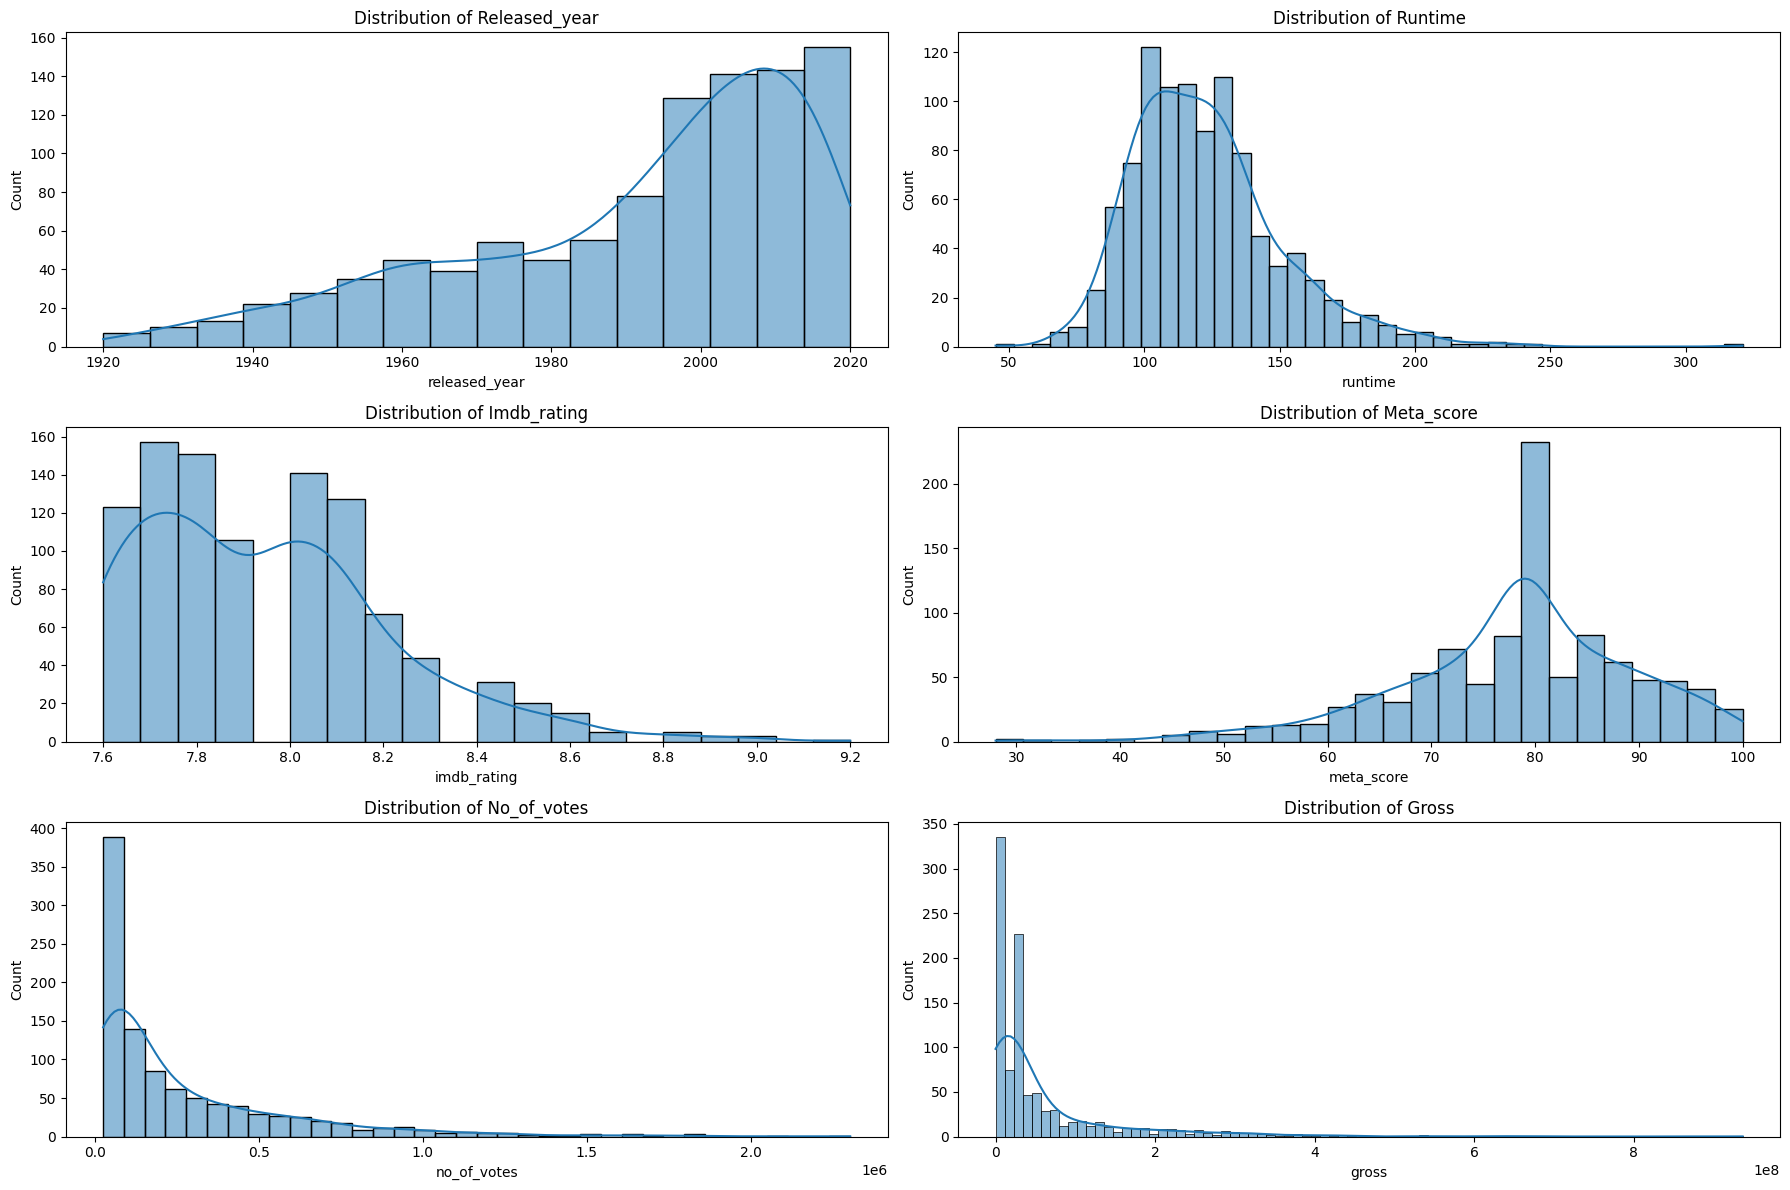

In [7]:
visualizer.numerical_univariate_analysis(3, 2)

### Observations:
- `runtime`, `imdb_rating` and `meta_score` have a distribution similar to a normal one
- `No_of_votes` and `Gross` have a heavily positively skewed distribution, with mode < median < mean
- The values of the columns are on different scales, with some columns ranging from units to hundreds and others being in the millions
### Impact:
- It would be interesting to test some methods to make the distributions of `No_of_votes` and `Gross` more closely resemble a gaussian one
- Scaling the data will be necessary for better results, but the scaler will be chosen after the columns are close to a gaussian distribution and taking into account the outliers

## Categorical Features

In [4]:
for i in df.select_dtypes("object"):
    if i != "genre":
        print(f"Unique {i}: {len(df[i].unique())}")
    else:
        # The velues of genre are lists, so the method explode needs to be used to get the unique values
        print(f"Unique genres: {len(df['genre'].explode().unique())}")

Unique series_title: 998
Unique certificate: 16
Unique genres: 21
Unique overview: 999
Unique director: 548
Unique star1: 659
Unique star2: 840
Unique star3: 890
Unique star4: 938


### Observations:
- `series_title` and `overview` are all different
- There are 21 unique genres in total
- `director` and all `star` columns have a lot of different people
### Impact:
- `series_title` and `overview` can probably be dropped, but there's still studies that can be done with them
- `director`, all `star` columns and `certificate` can have their values grouped into categories

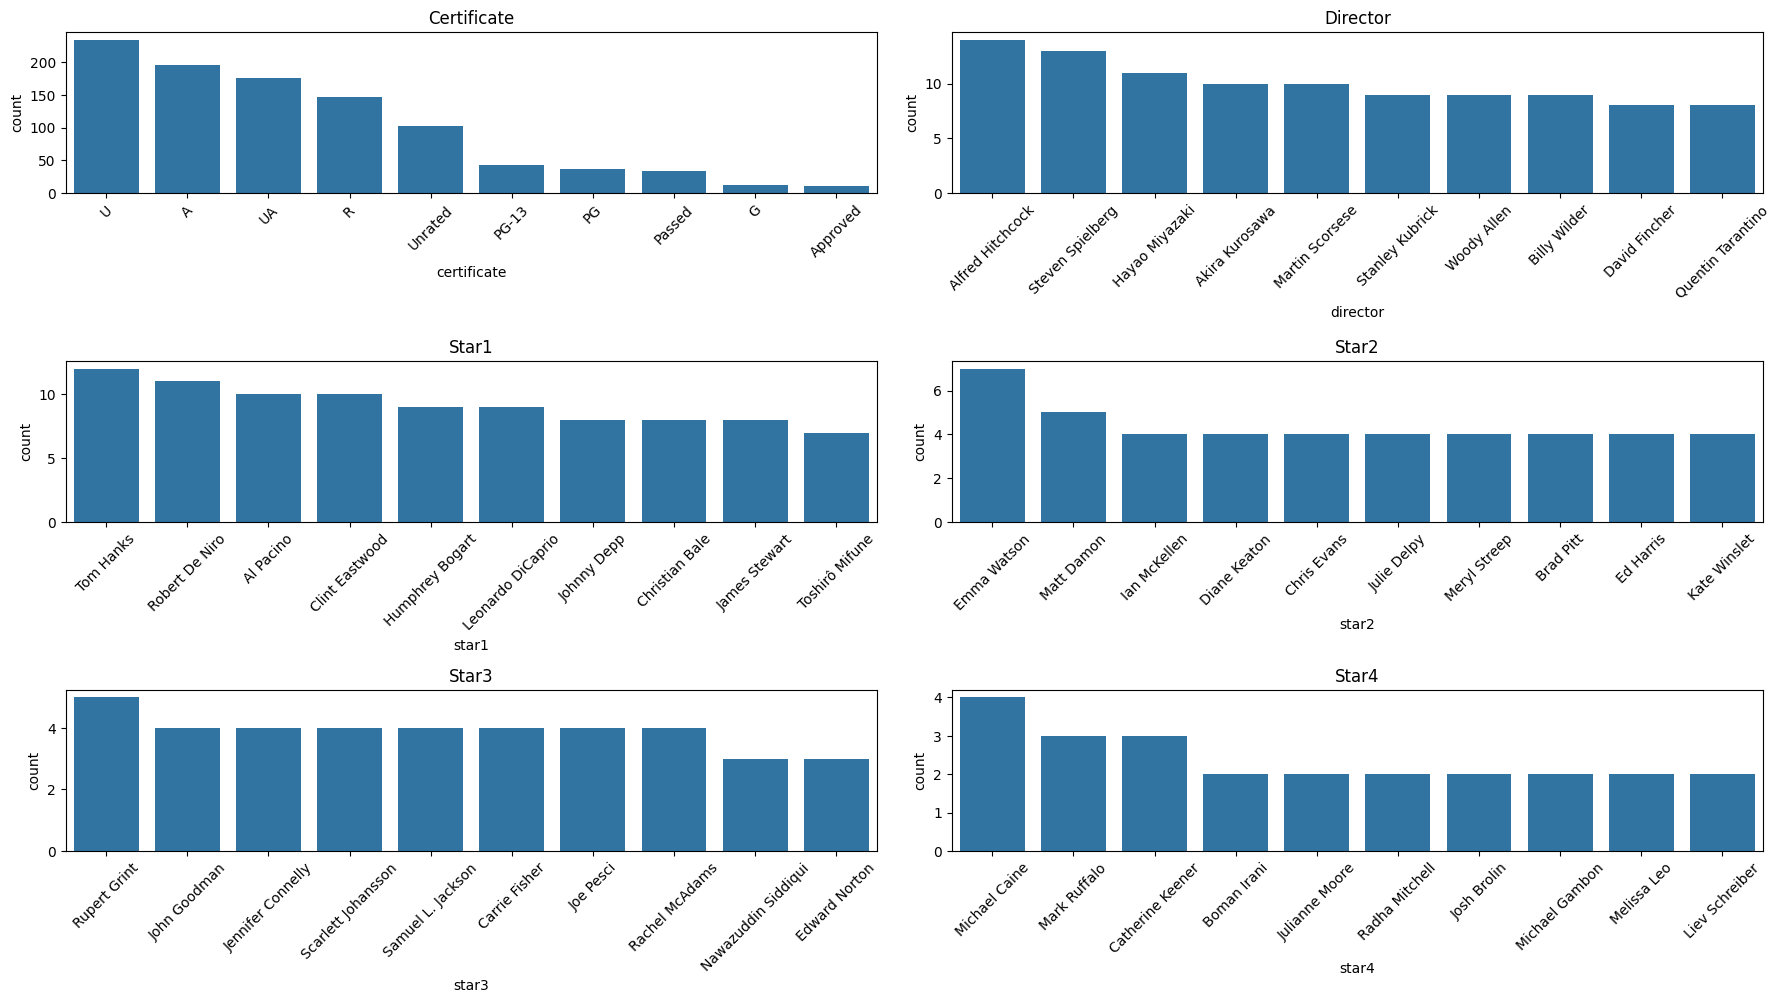

In [9]:
visualizer.categorical_univariate_analysis(["certificate", "director", "star1", "star2", "star3", "star4"], 4, 2)

In [5]:
# Creating a new dataframa for analysing the "genre" column
df_genre_exploded = df[['genre', 'imdb_rating', 'gross']].copy()
df_genre_exploded = df_genre_exploded.explode("genre").reset_index(drop=True)

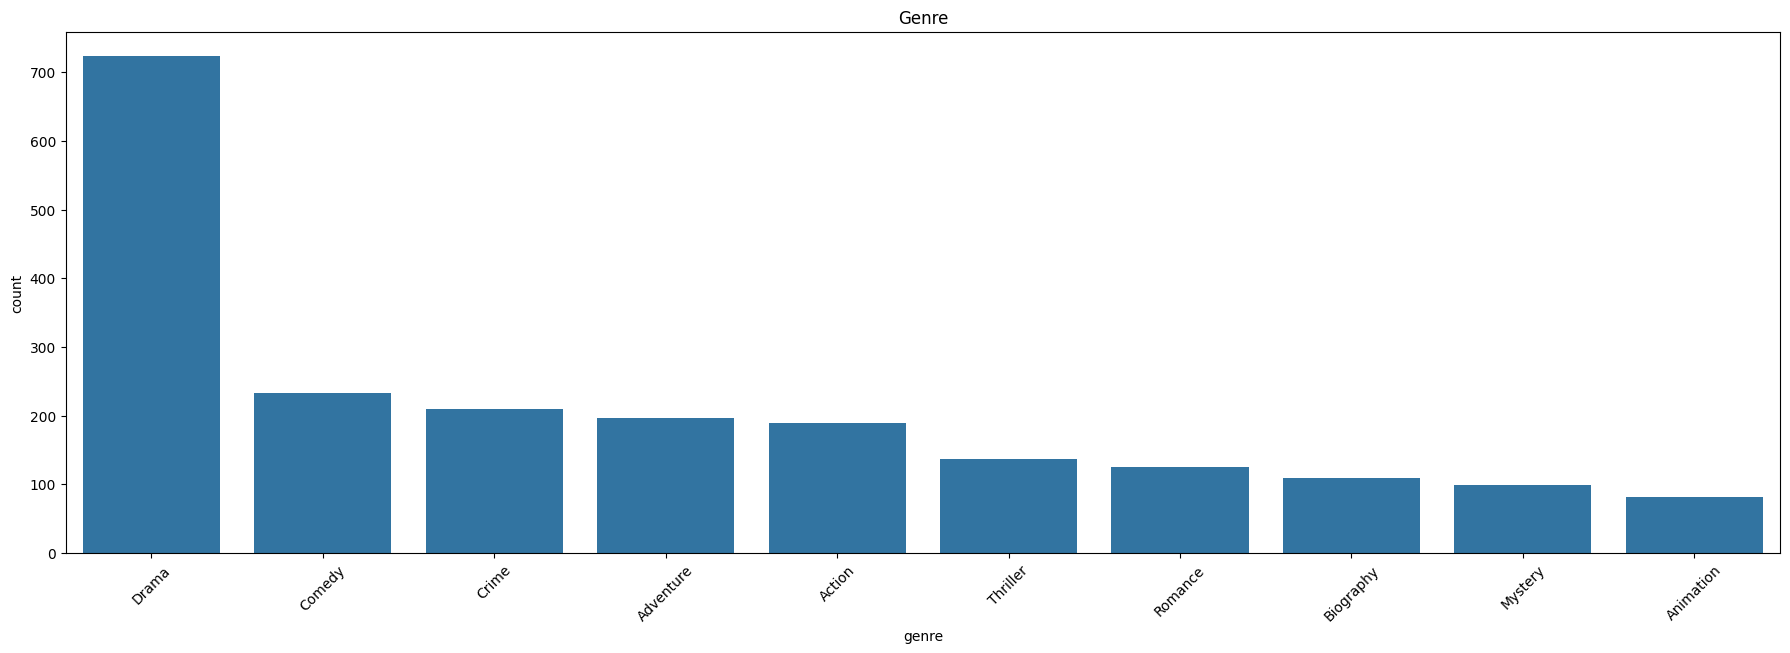

In [6]:
visualizer_genre = Visualization(df_genre_exploded)
visualizer_genre.categorical_univariate_analysis(["genre"], 2, 1)

In [15]:
def get_top_values(column, n=10):
    return set(df[column].value_counts().head(n).index)
top_values_col1 = get_top_values("star1")
top_values_col2 = get_top_values("star2")
top_values_col3 = get_top_values("star3")
top_values_col4 = get_top_values("star4")

intersection_all = top_values_col1.intersection(top_values_col2).intersection(top_values_col3).intersection(top_values_col4)

print(f"Stars that appear in the top 10 in all star columns: {intersection_all}")


Stars that appear in the top 10 in all star columns: set()


### Observations:
- Since all categorical columns have a high amount of different values, only the top 10 were plotted
- `certificate` shows that "U", "A", "UA", "R" and "Unrated" are by far the most used certificates
- Drama is by far the most watched genre, appearing almost three times more than the second place
- There's no actor in the same top 10 of all `star` columns

# Features x Target

## Numerical Features

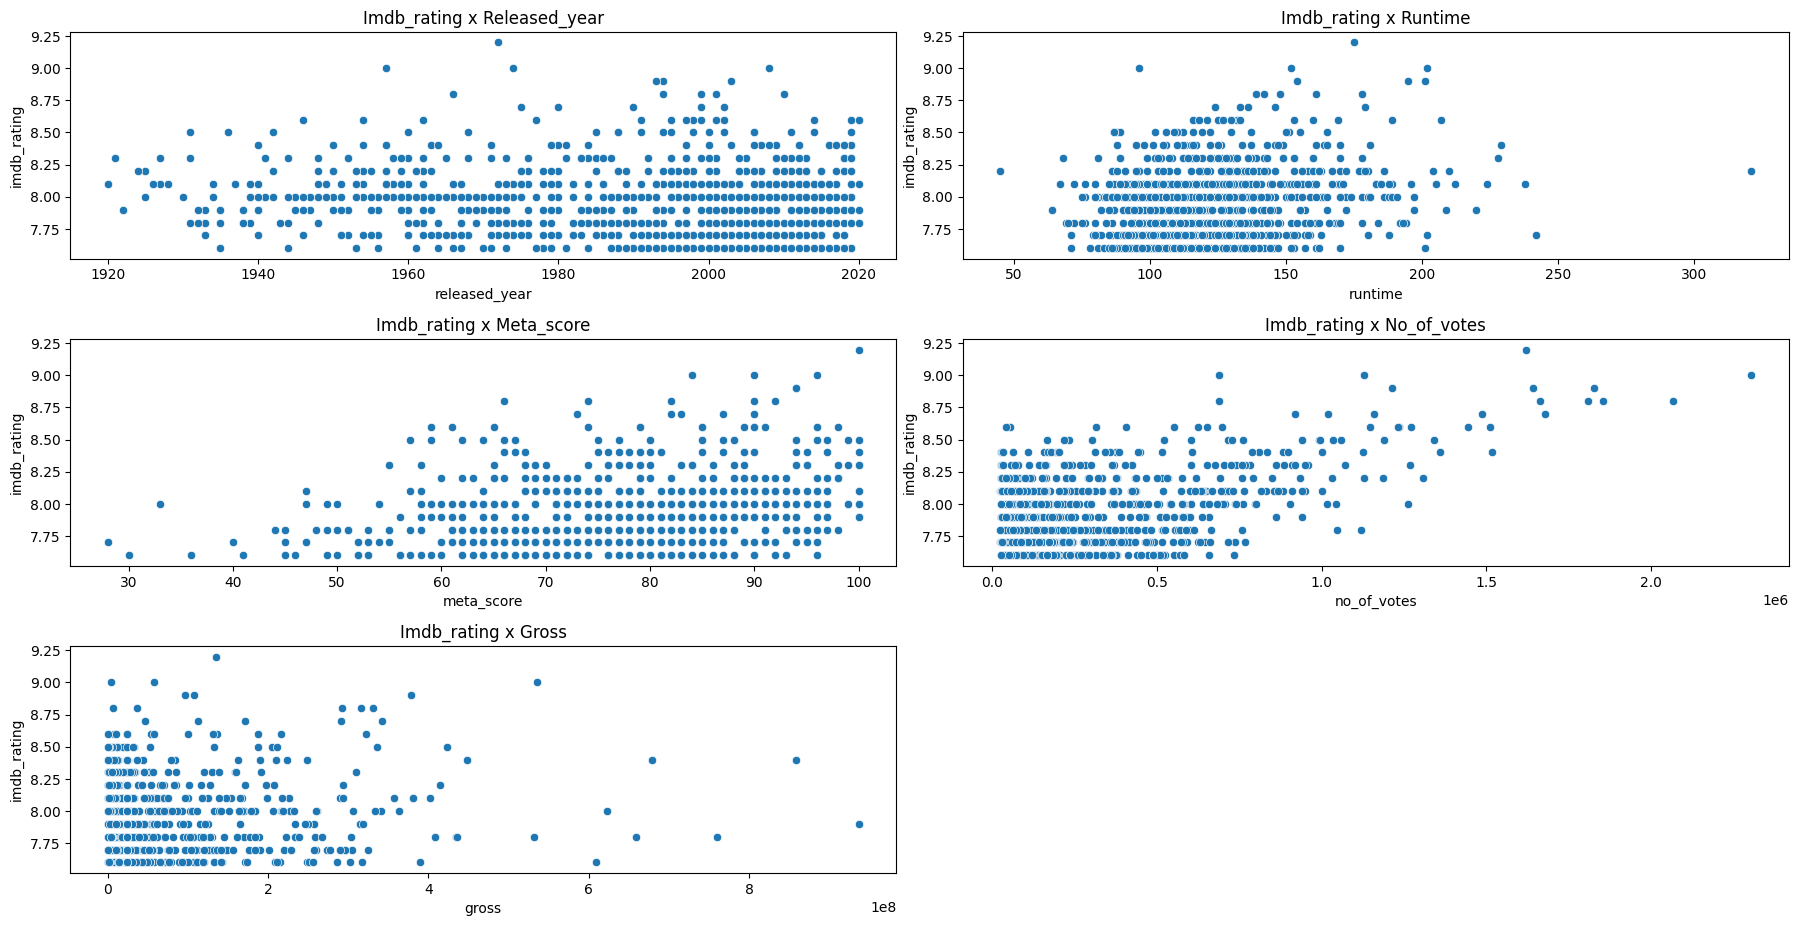

In [11]:
visualizer.num_features_vs_target(4, 2, "imdb_rating")

### Observations:
- `released_year` shows that there's no connection to the target, with no clear correlation pattern visible
- `runtime` shows similar behavior to `released_year`
- `meta_score` shows a positive non-linear correlation to the target. When the meta score is in an extreme, the target score is also there. But if the meta score is in the middle, the target score can vary
- `no_of_votes` show a positive correlation to the target after the 500k mark, where a lot of people seem to have the same opinion of the movie. Before that, it shows a negative non-linear correlation, where there is a smaller amount of votes, so this could be movies that are not well known and the majority of votes are from critics, who are usually harsh
- `gross` shows a negative non-linear correlation with the target up until around the 300 million mark. After that, theres noise in the data, without a clear correlation between these features. This feature does have an impact on the rating, but because of these outliers, it may not have a big impact on the model

## Categorical Features

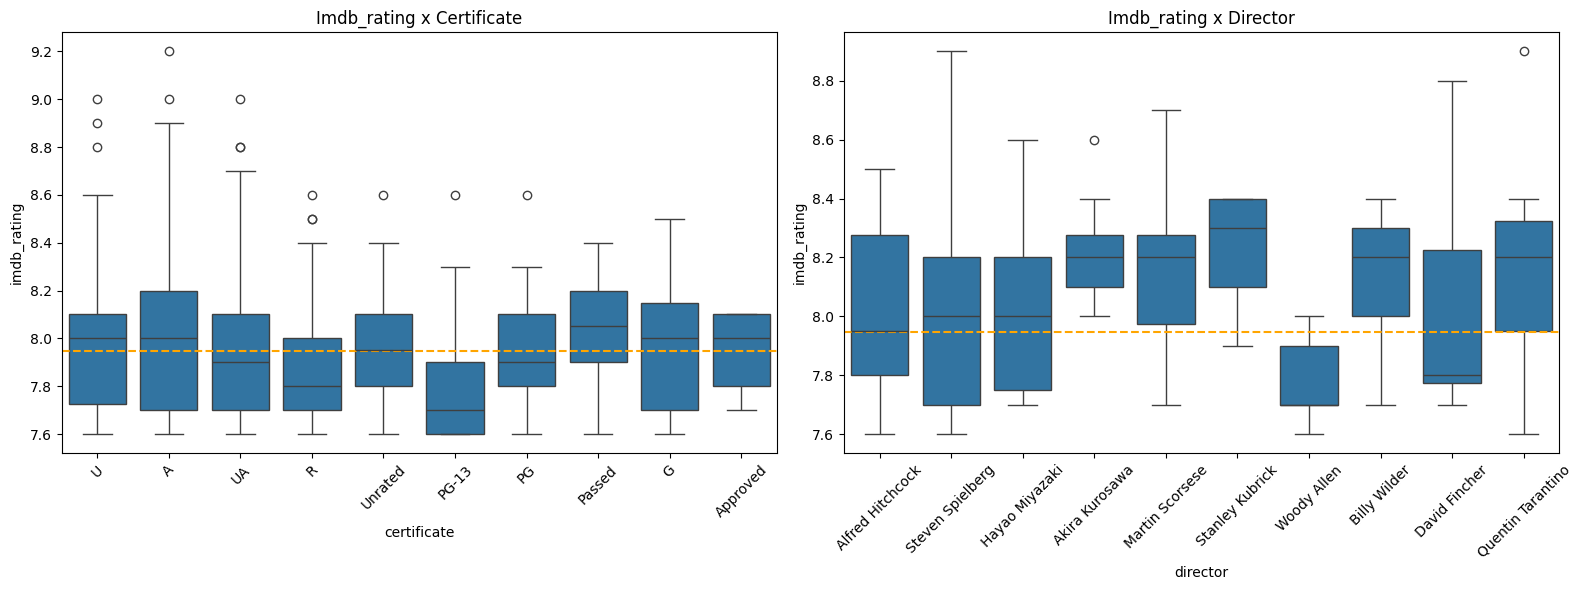

In [17]:
visualizer.cat_features_vs_target(1, 2, "imdb_rating", ["certificate", "director"], figsize=(16, 6))

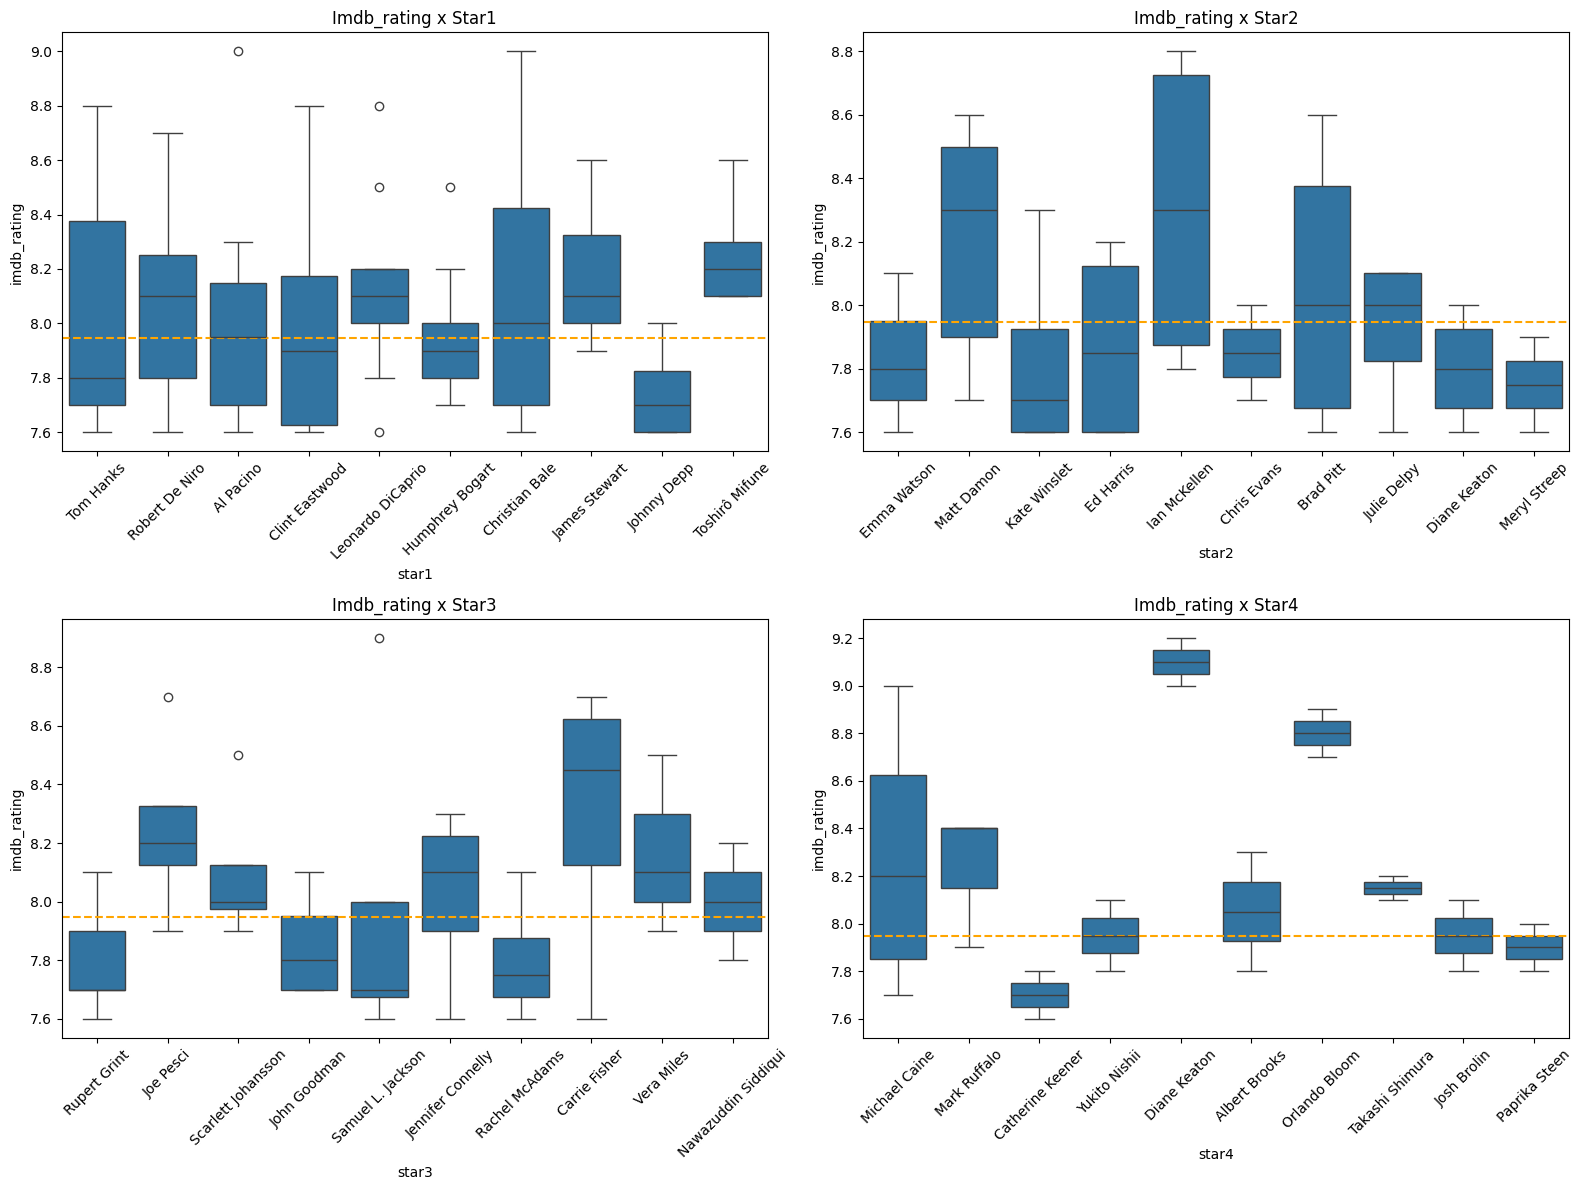

In [13]:
visualizer.cat_features_vs_target(2, 2, "imdb_rating", ["star1", "star2", "star3", "star4"], figsize=(16, 12))

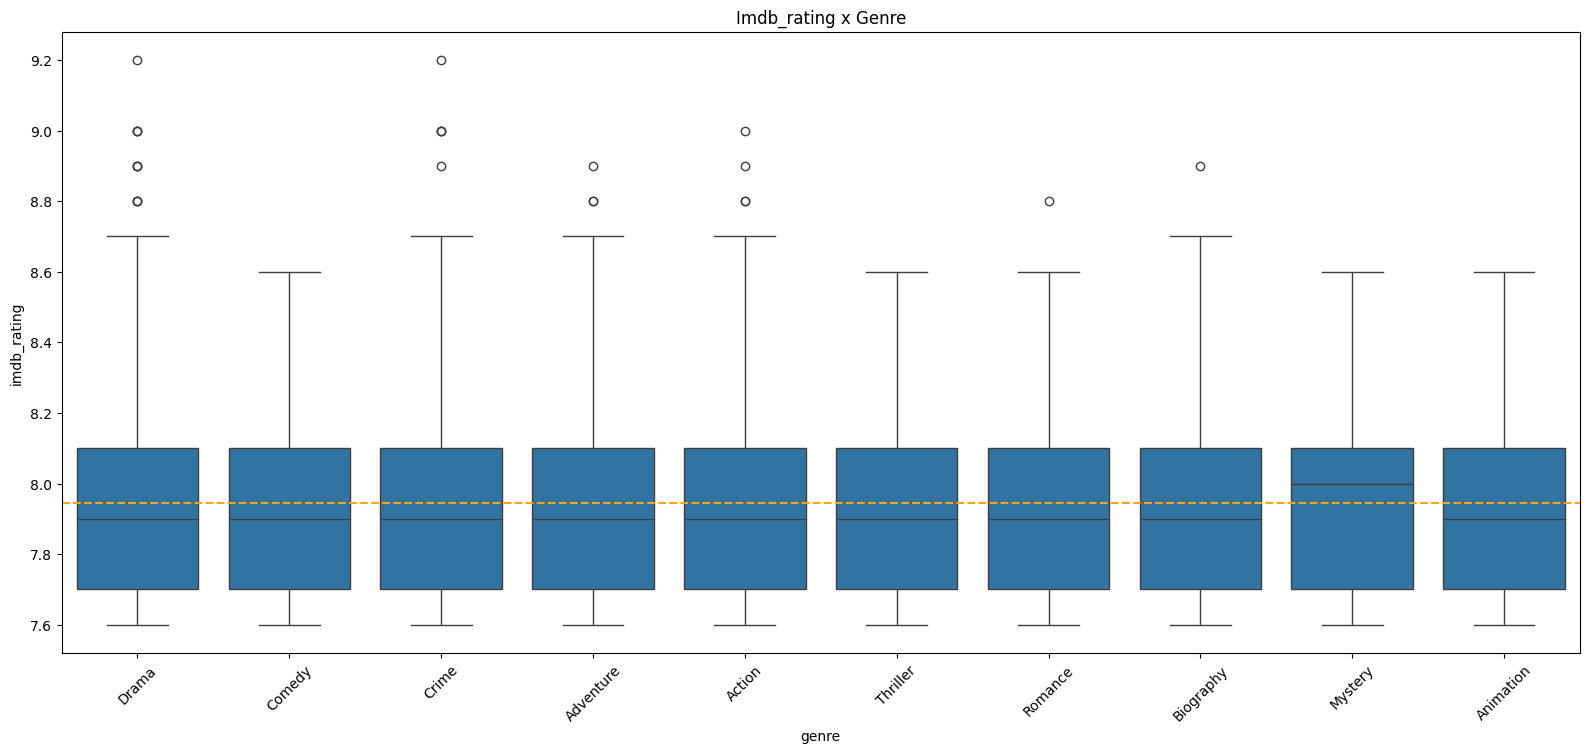

In [18]:
visualizer_genre.cat_features_vs_target(2, 1, "imdb_rating", ["genre"], figsize=(16, 14))

### Observations:
- `certificate` shows that half of the top 10 most used certificates have a median rating above the average
- `director` shows an interesting behavior, where the directors with the most appearances are well above the mean rating, meaning that grouping directors by how many times they appear in the dataset might be a good idea
- The `star` columns are interesting. `star3` shows that actors that appeared the most tend to have a mix of ratings, with the ones from the top 7 and below the ones with a higher rating than the average. The rest of the `star` columns don't seem to show a great relation with the rating, where an actor can be very famous and appear various times, but the movies may vary from very good to very bad
- Mystery is the only genre in the top 10 that has a median rating above average. Drama, which is the most viewed genre by a factor of 3 times, does have movies with high ratings, but the median score is below the mean. Also, excluding mystery, all others in the top 10 show very similar behavior in relation to the rating

# Multivariable Analysis

## Certificate x Numericals

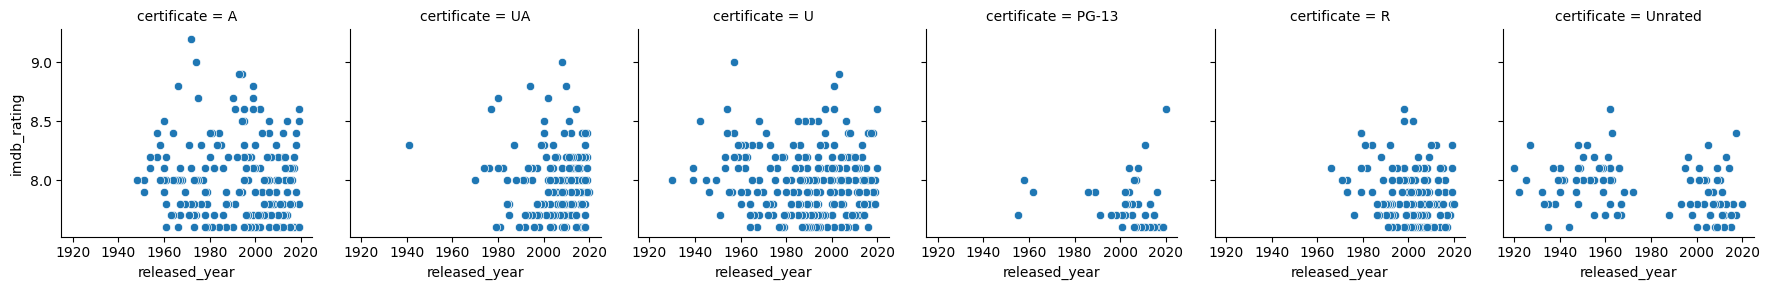

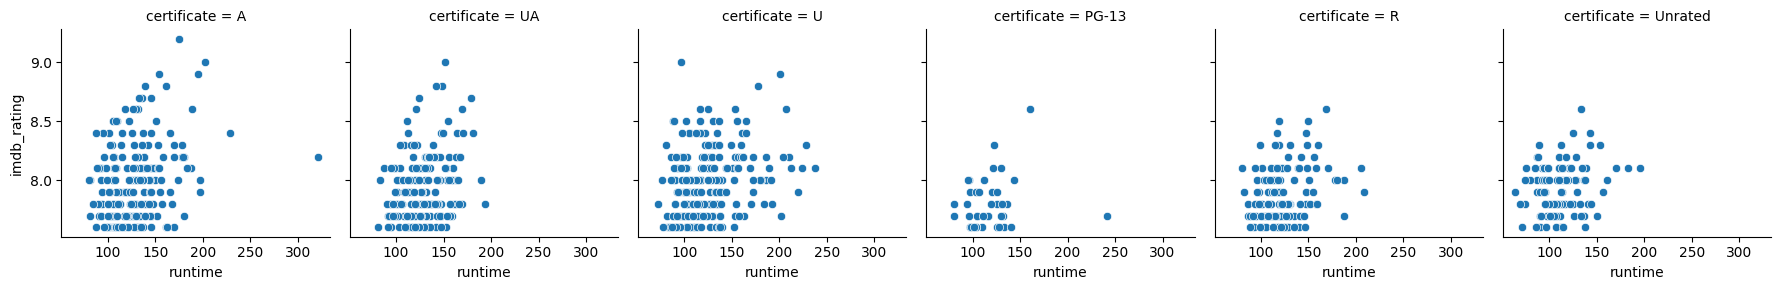

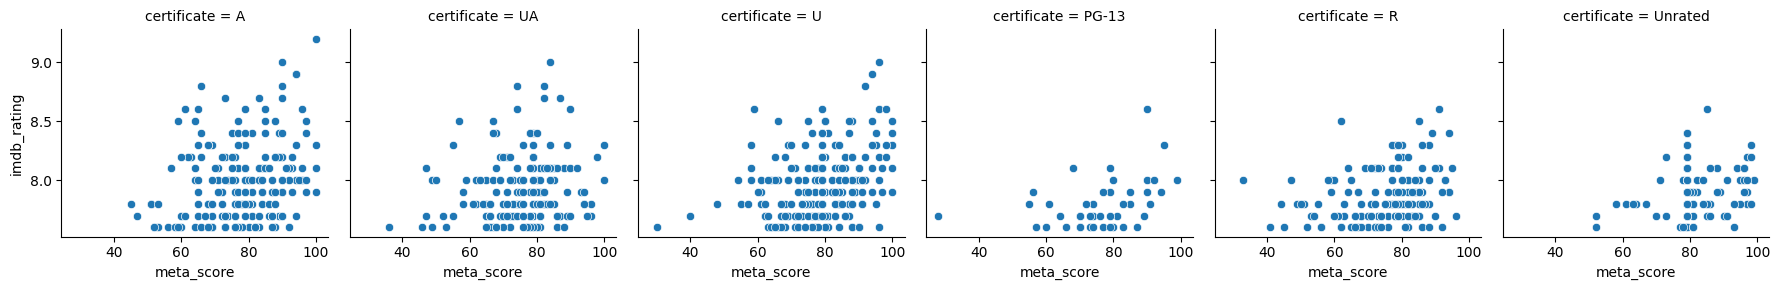

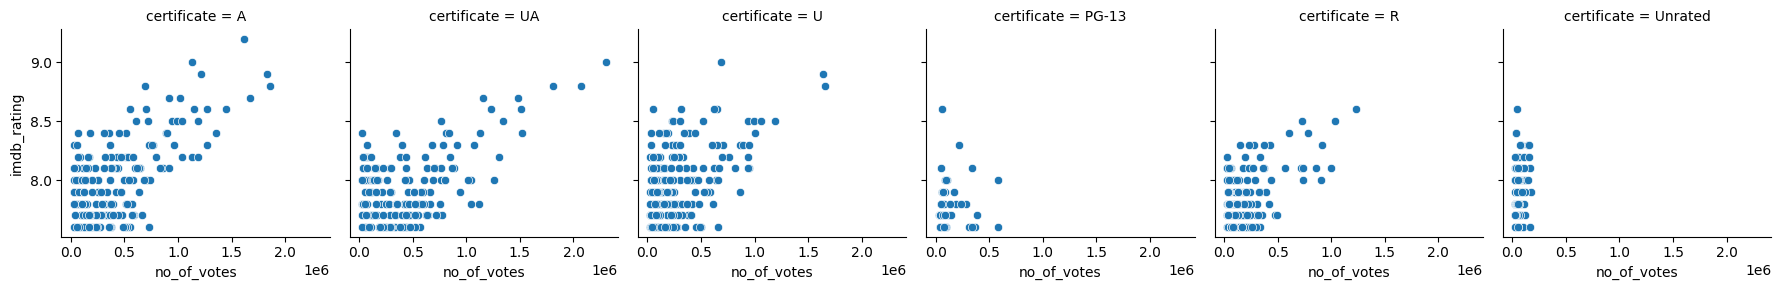

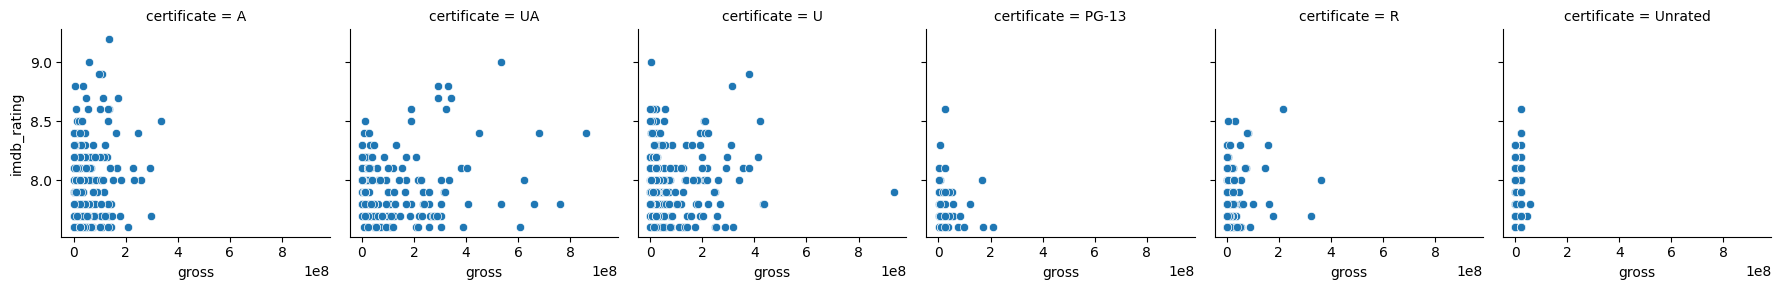

In [19]:
visualizer.facegrid_hist_target(facecol="certificate", target="imdb_rating")

### Observations:
- Only the top 6 certificates were plotted
- `released_year` shows that more recently, there's been a surge of movies rated "UA", "PG-13" and "R", with the ratings of "PG-13" being lower than the other certificates
- `runtime` shows similar behavior as `certificate` regarding the ratings, with movies rated "PG-13" tending to be shorter and having the lowest ratings. We can see that the runtime doesn't actually have a strong correlation to rating in regard to the certificate of the movie, which is the same result found in the previous analysis of `runtime` x `imdb_rating`  
- `meta_score` has the same pattern for all types of certificates and the same behavior that was found in the features x target analysis, with a positive non-linear relation with the rating
- `no_of_votes` shows the same behavior as the features x target analysis. Movies where the audience tends to give a vote, that is, "A", "UA" and "U", tend to get higher ratings (if the number of votes is higher than approximately 500k). Less than 500k votes means that there's a negative non-linear relation between the `no_of_votes` and `imdb_target`, and we can see this clearly in the "PG-13" rated movies, with only unrated movies not showing any type of relation between these variables
- `gross` has the same behavior as `no_of_votes` and the one found in the features x target analysis. Unrated and "R" rated movies don't show a clear correlation between the variables, but the rest of the certificates show a negative non-linear correlation, with "UA" and "U" rated movies introducing noise to the data after the 300 million mark

## Director x Numericals

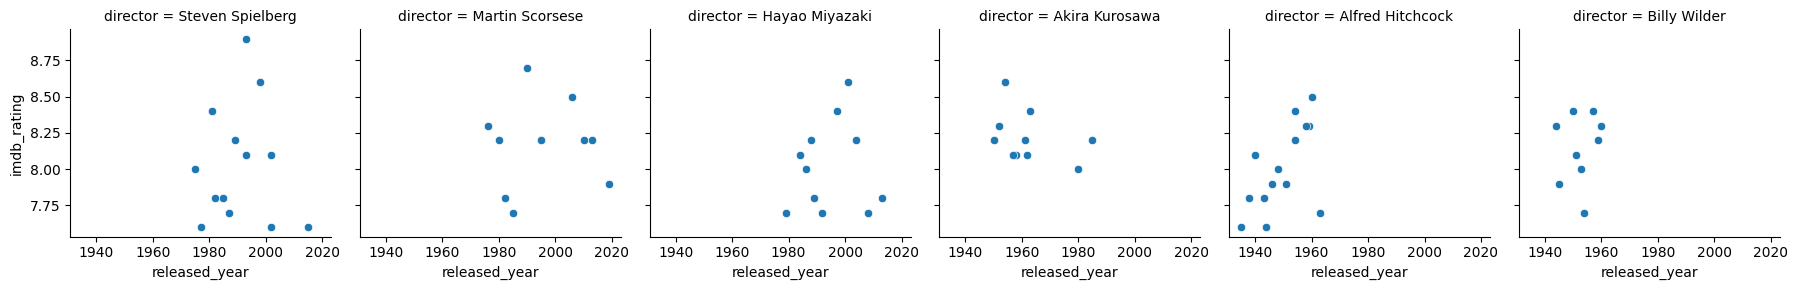

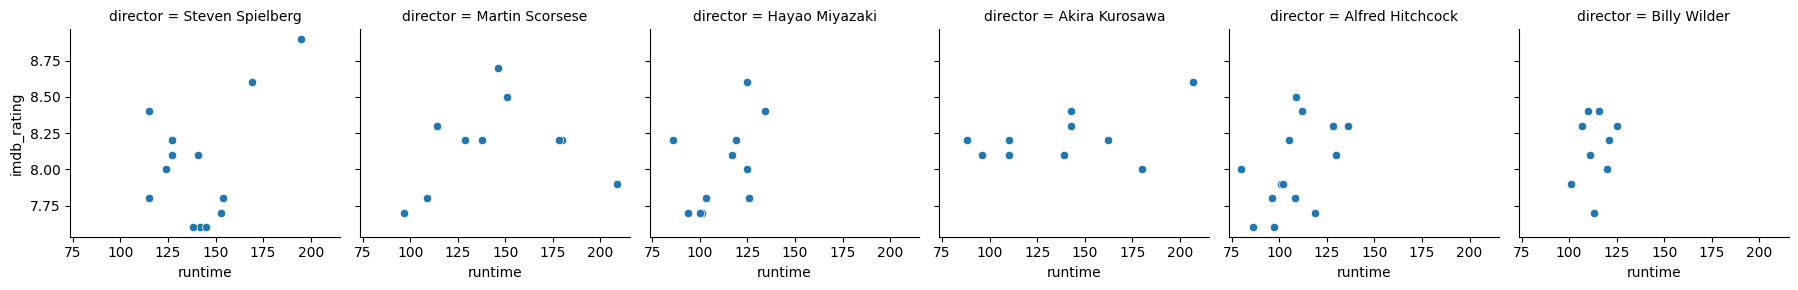

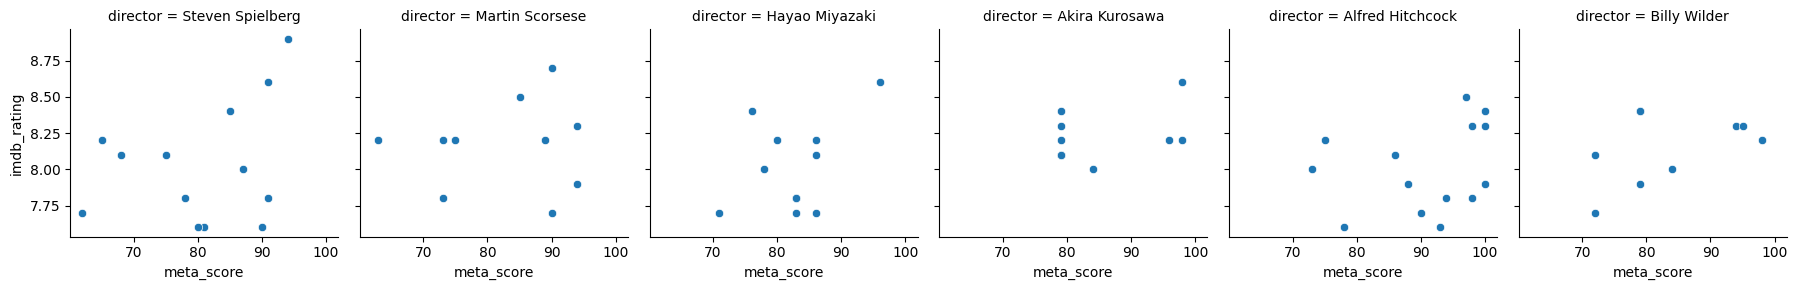

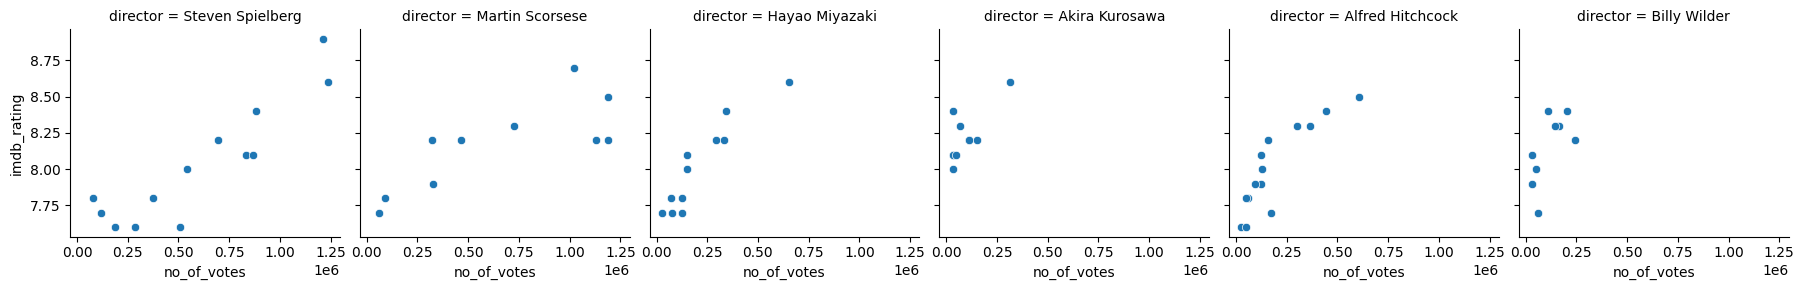

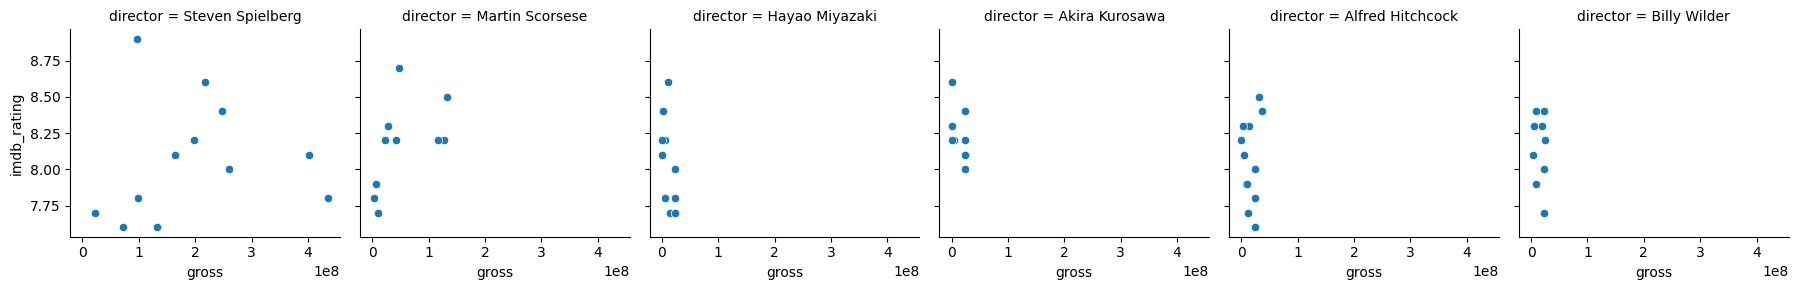

In [15]:
visualizer.facegrid_hist_target(facecol="director", target="imdb_rating")

### Observations:
- Only the top 6 directors were plotted
- `released_year` shows more the age of the directors than a relation with the rating
- `runtime` has the same behavior as `released_year`, with no clear correlation with the rating
- `meta_score` is interesting. Depending on the director, it shows the positive non-linear correlation with the rating, as previously seen in other analyses
- `no_of_votes` is also interesting. The cut-off point with the directors to form a positive correlation to the rating is 250k votes, different from what was seen in the other analyses
- `gross` showed no relation to the target, regardless of the director

## Stars x Numericals

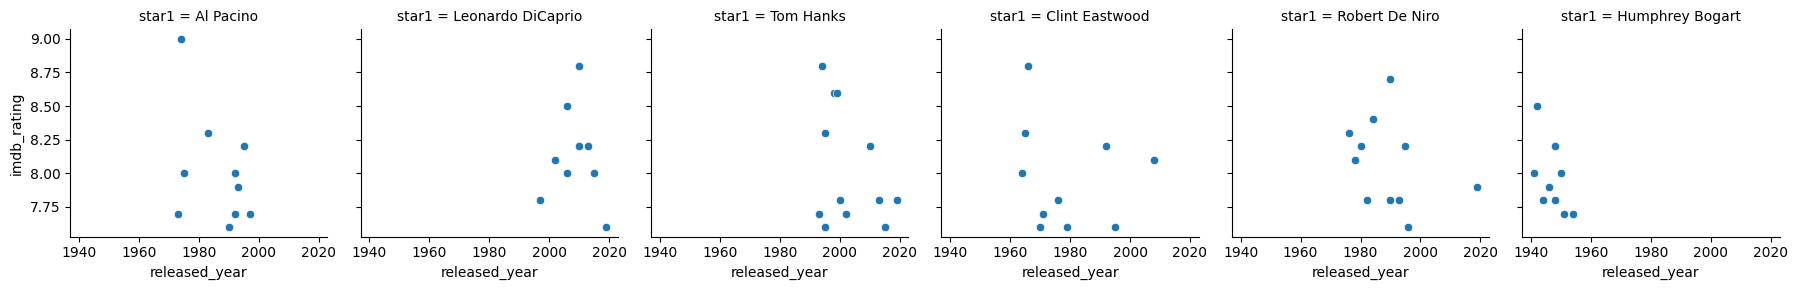

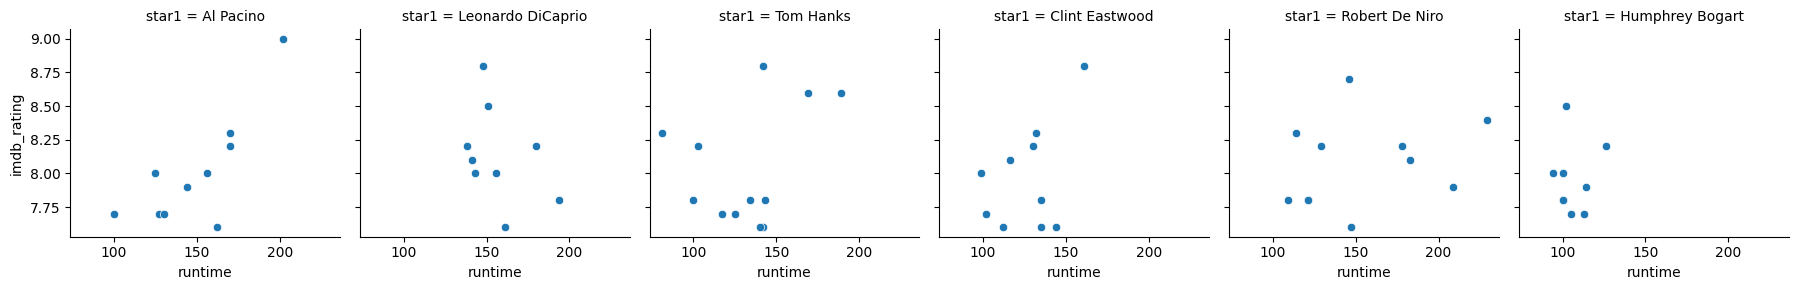

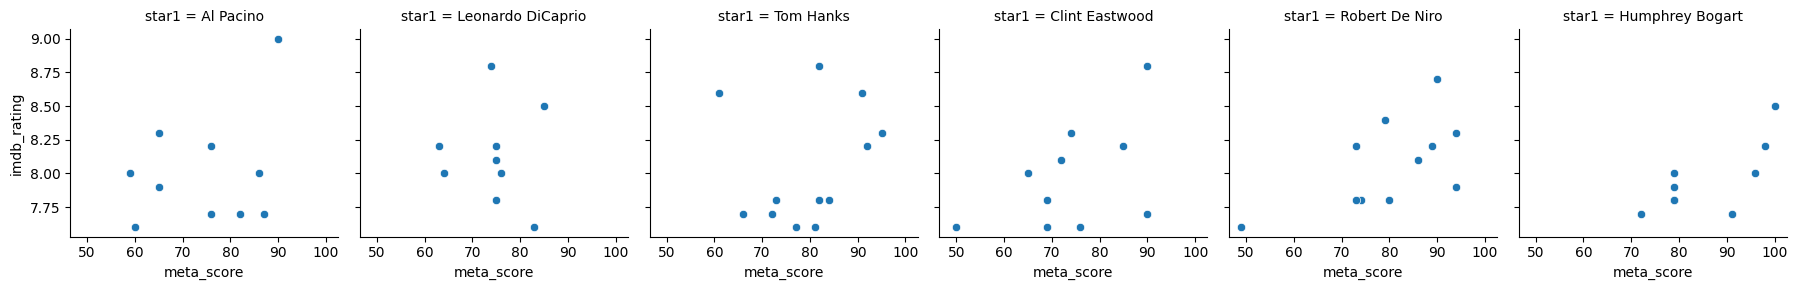

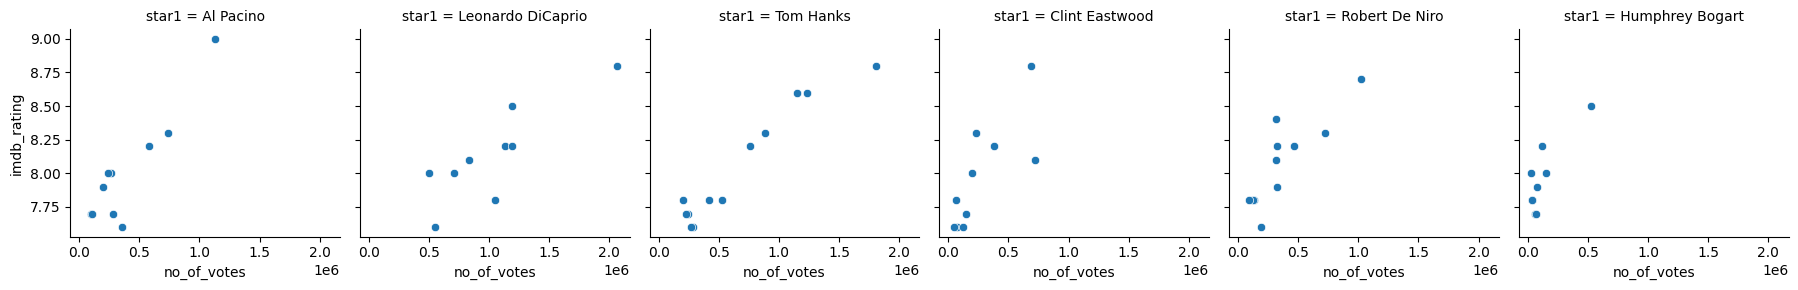

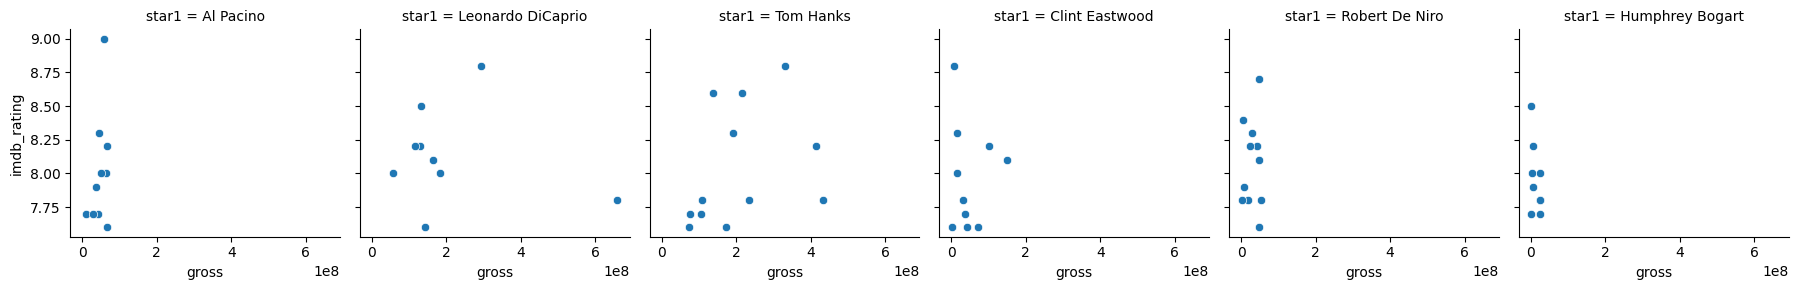

In [16]:
visualizer.facegrid_hist_target(facecol="star1", target="imdb_rating")

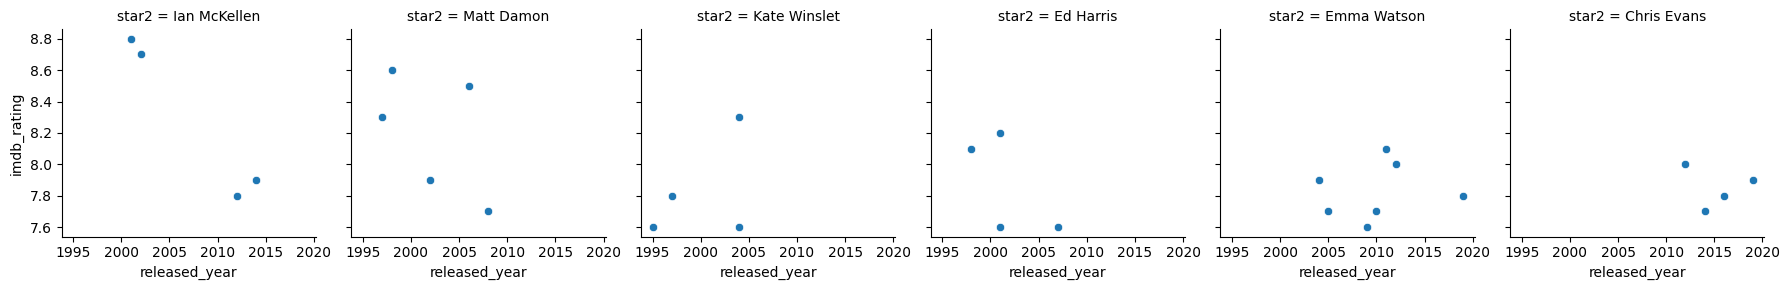

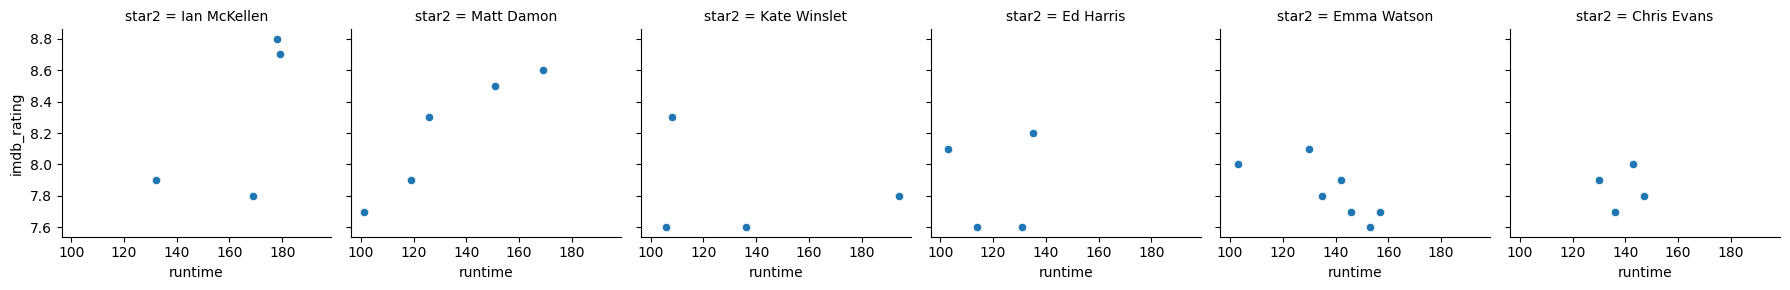

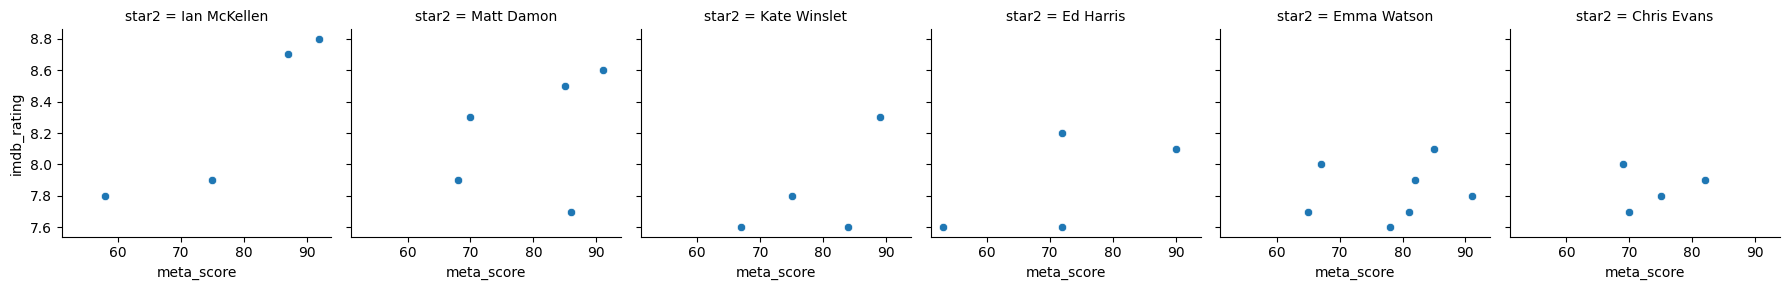

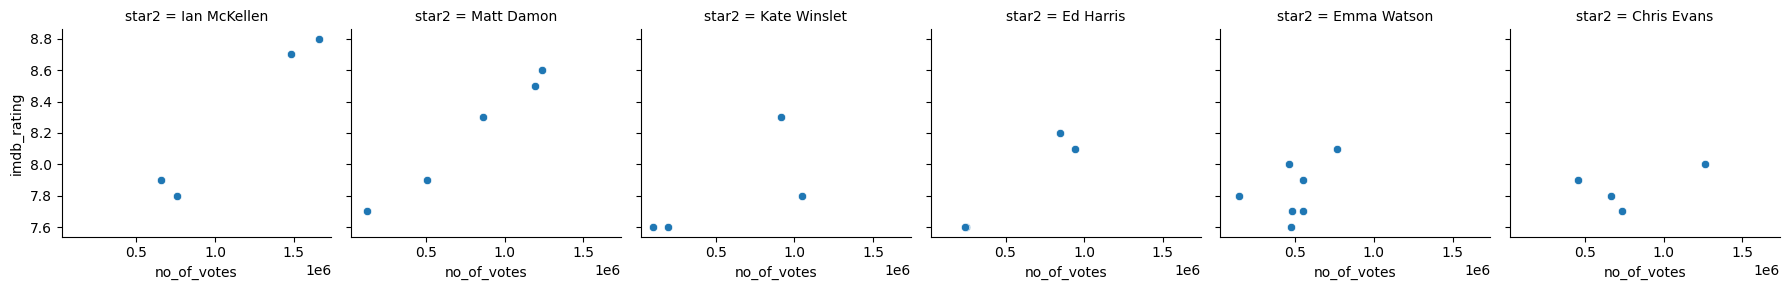

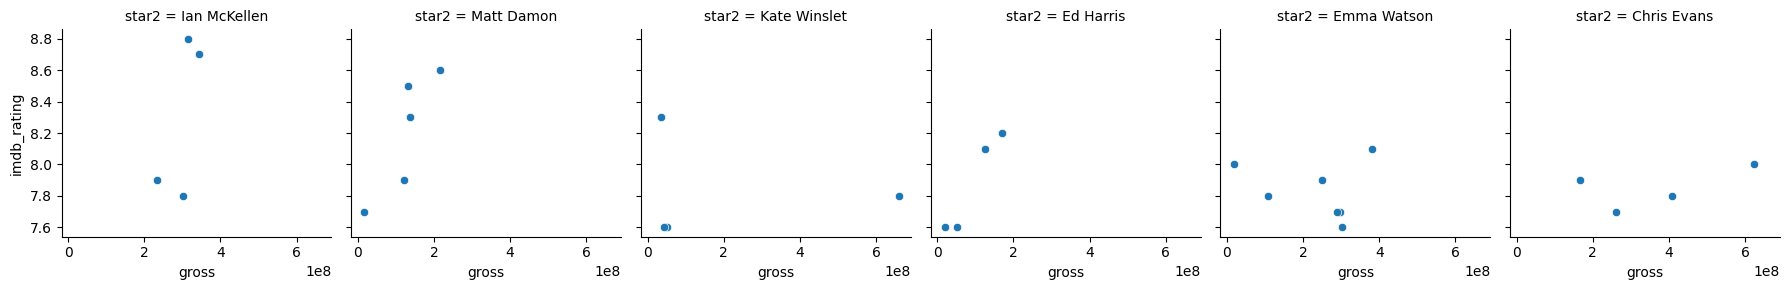

In [17]:
visualizer.facegrid_hist_target(facecol="star2", target="imdb_rating")

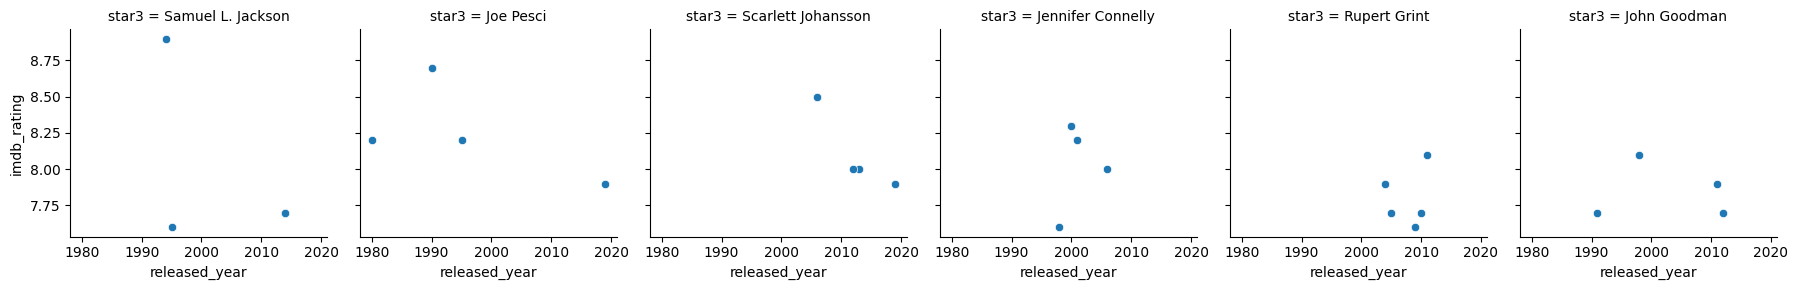

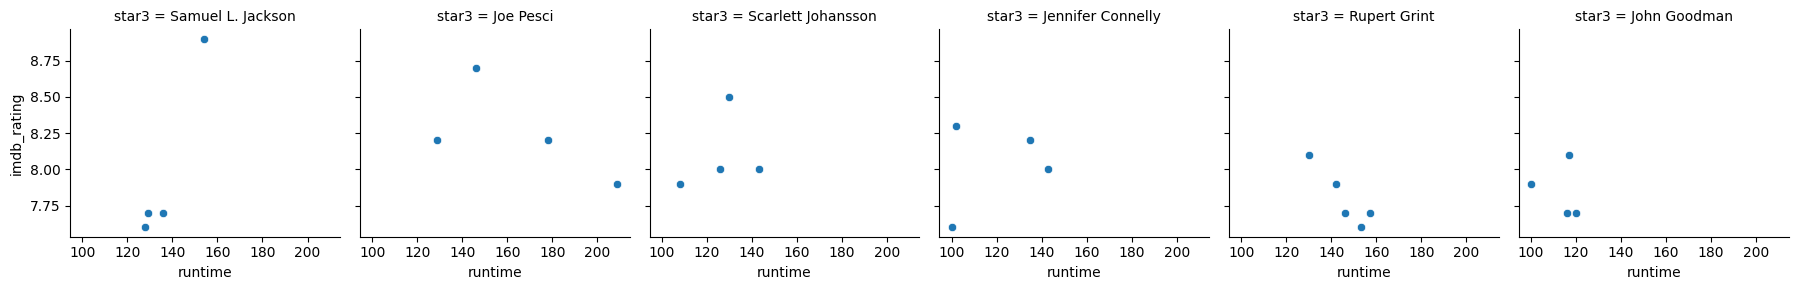

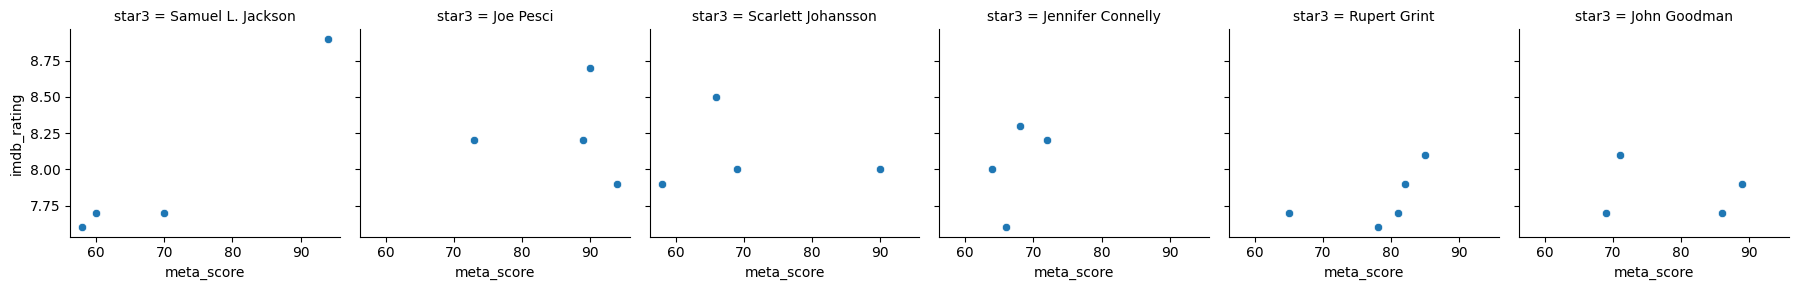

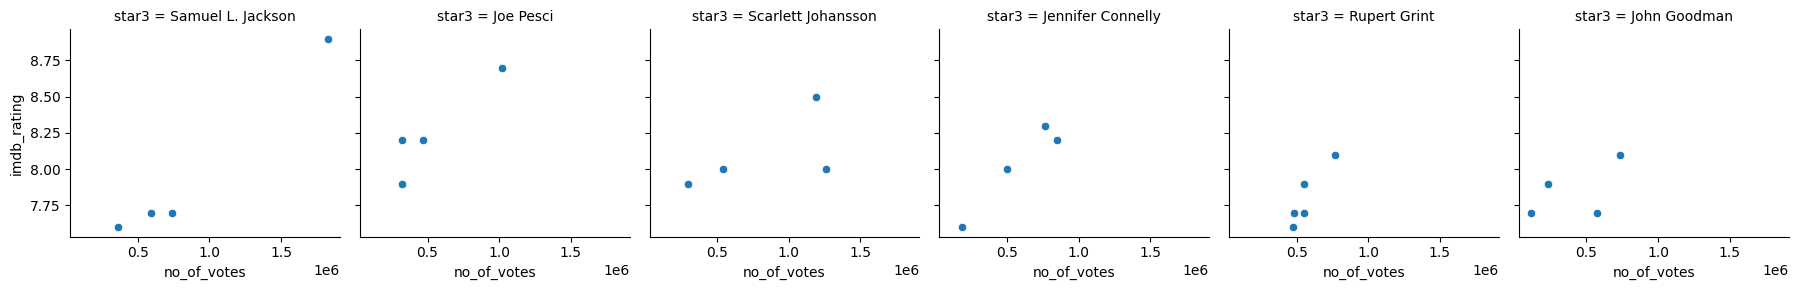

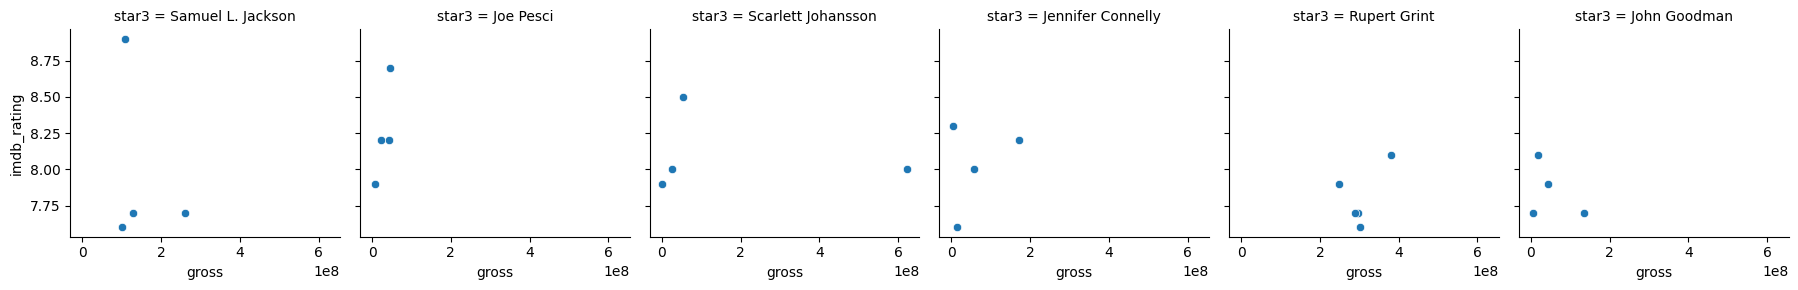

In [18]:
visualizer.facegrid_hist_target(facecol="star3", target="imdb_rating")

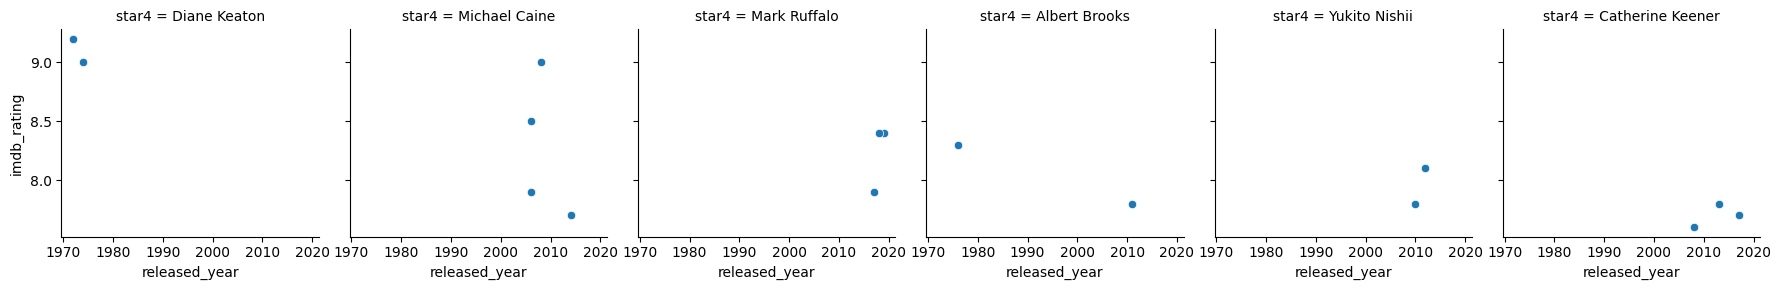

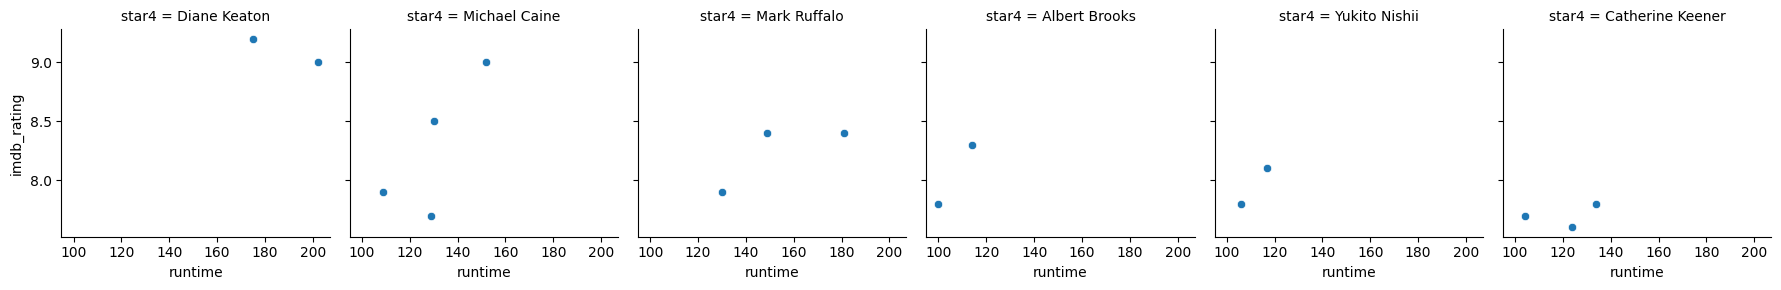

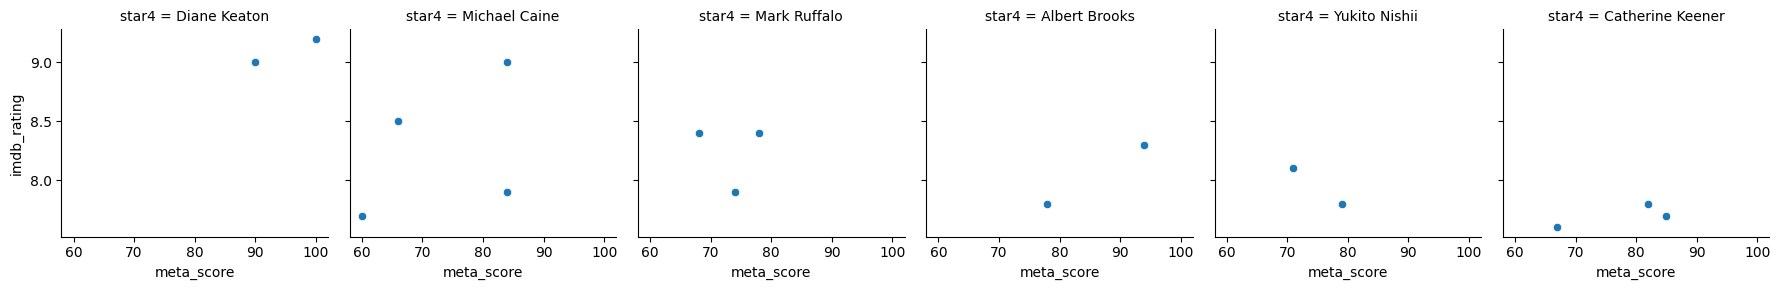

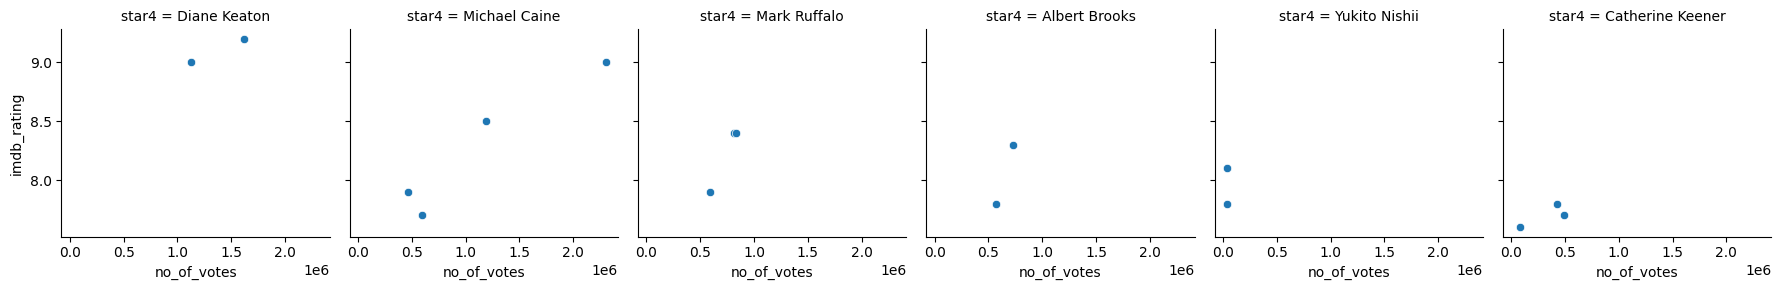

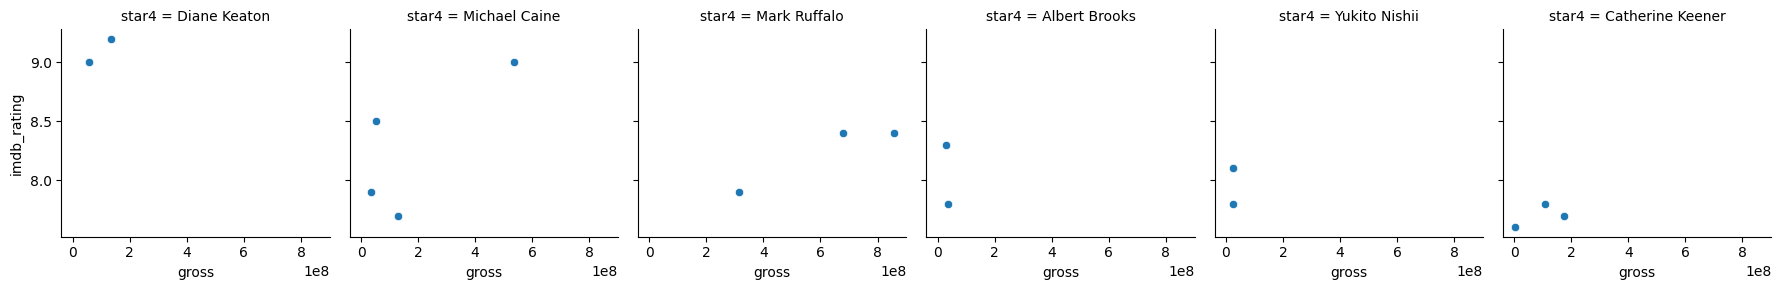

In [19]:
visualizer.facegrid_hist_target(facecol="star4", target="imdb_rating")

### Observations:
- Only the top 6 stars of each `star` column were plotted
- `released_year` and `runtime` show the same behavior for all `star` columns as shown in the `director` column
- `meta_score` is interesting. Depending on the star, it shows a positive non-linear correlation with the rating, as previously seen in other analyses. But an argument can be made that this conclusion is not possible, given the lack of data points in the graphs
- In the majority of stars, `no_of_votes` show the positive correlation with the target after the 500k votes, as seen in previous analyses
- `gross` showed no relation to the target, regardless of the star

## Numericals x Numericals

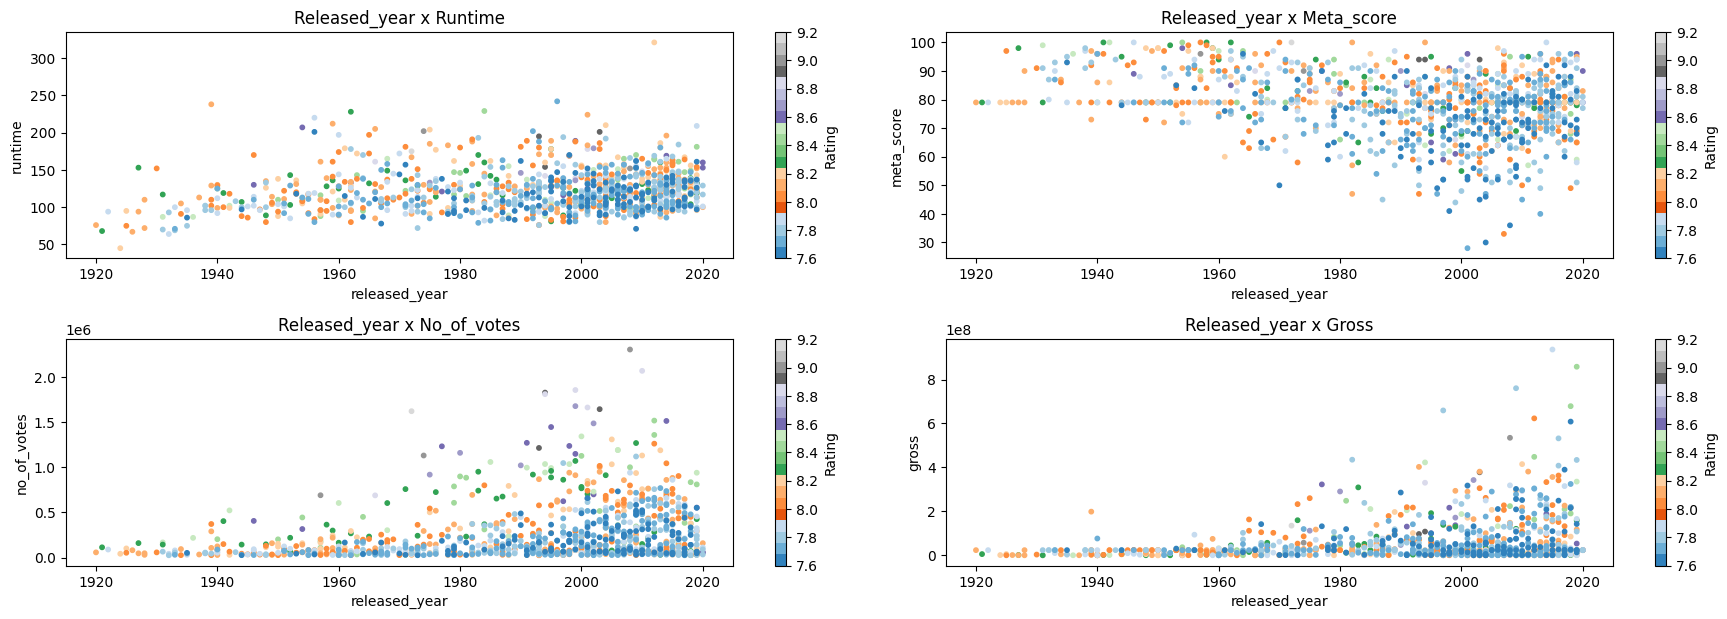

In [20]:
visualizer.plot_scatter_numericals_target(4, 2, "imdb_rating", "released_year")

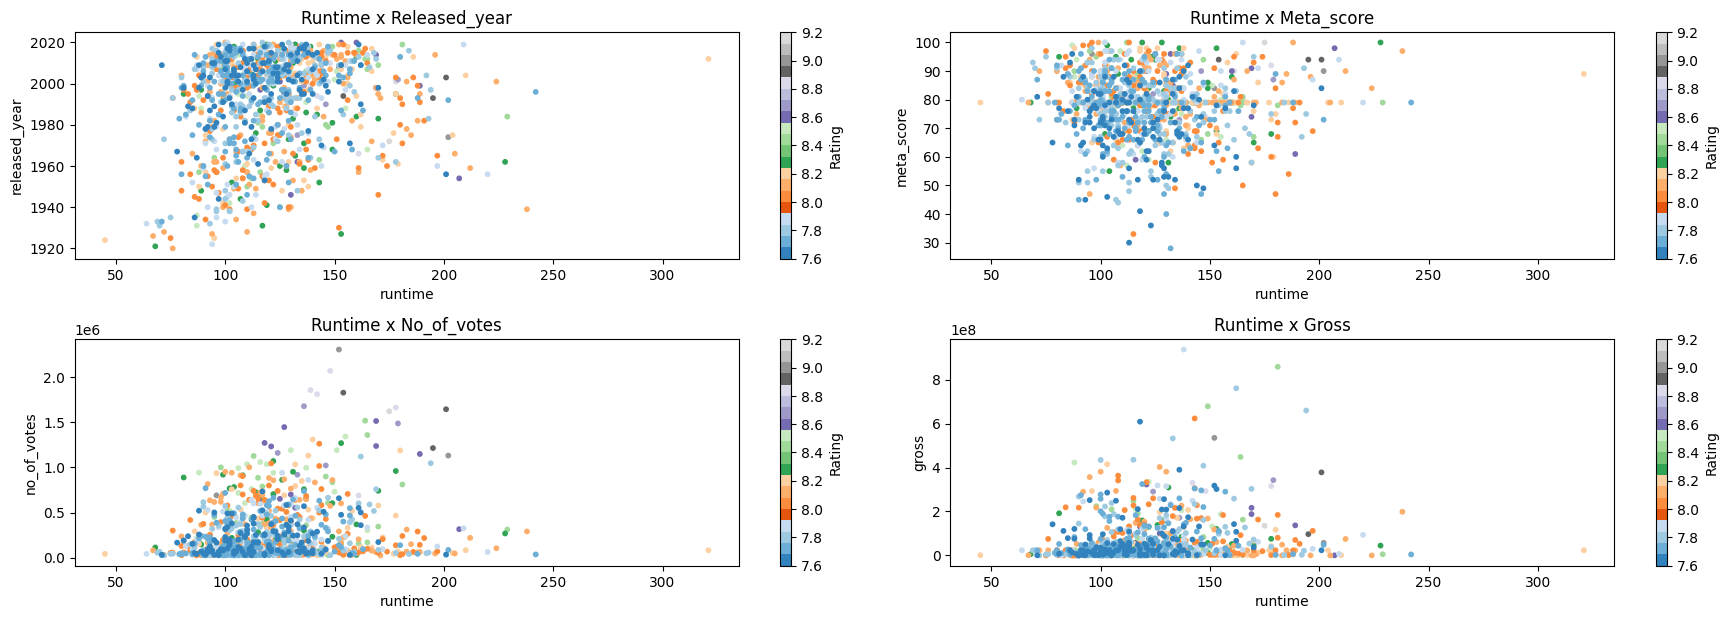

In [21]:
visualizer.plot_scatter_numericals_target(4, 2, "imdb_rating", "runtime")

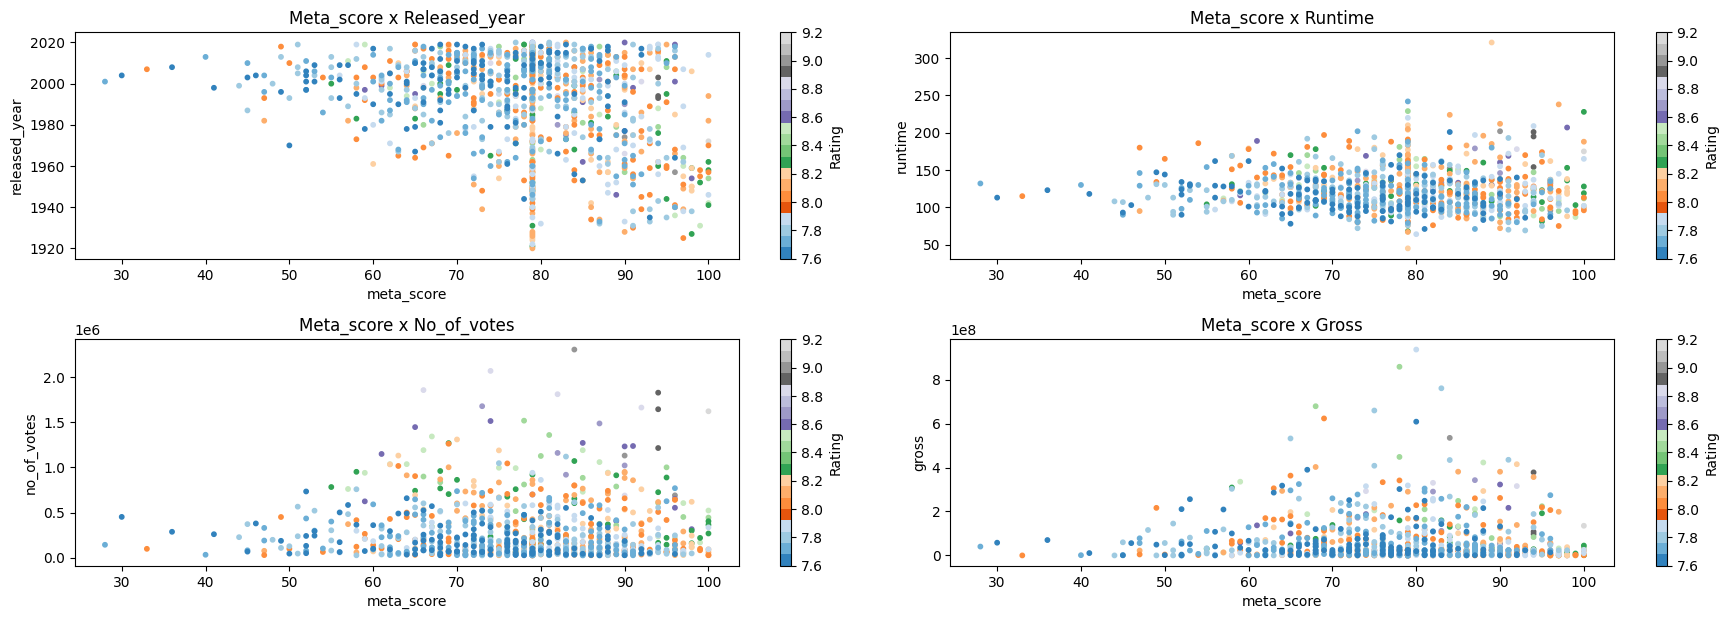

In [22]:
visualizer.plot_scatter_numericals_target(4, 2, "imdb_rating", "meta_score")

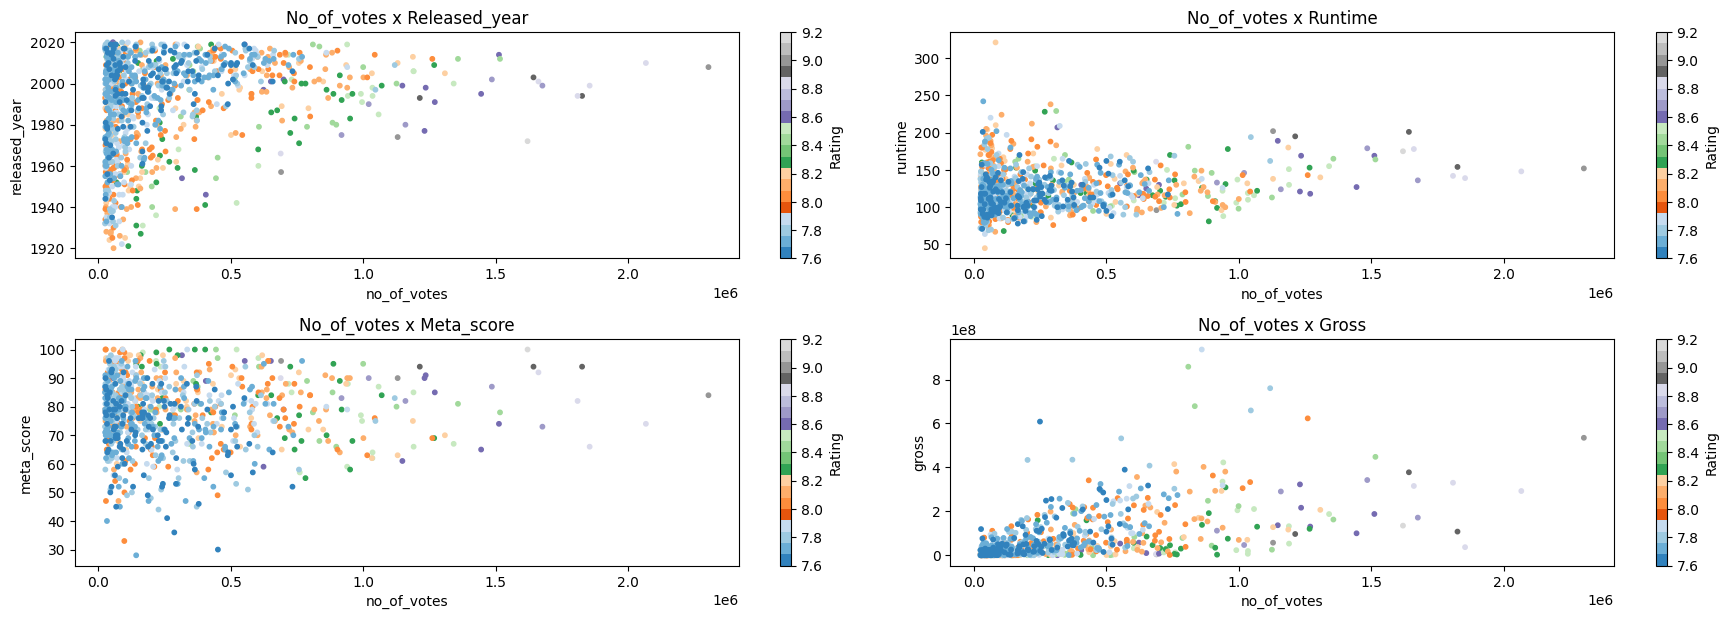

In [23]:
visualizer.plot_scatter_numericals_target(4, 2, "imdb_rating", "no_of_votes")

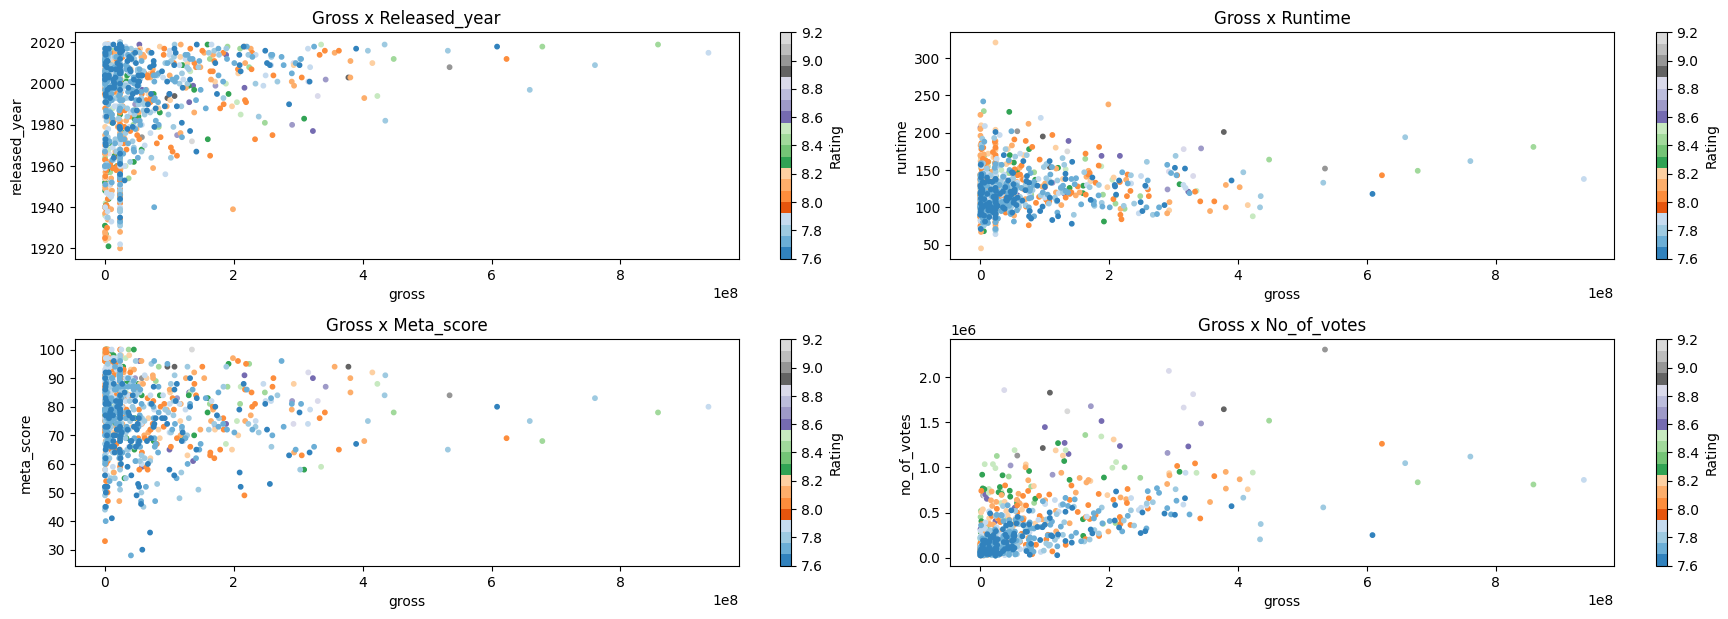

In [24]:
visualizer.plot_scatter_numericals_target(4, 2, "imdb_rating", "gross")

### Observations:
- `released_year` showed no relation with `runtime`. With `meta_score`, the newer the movie, the lower its meta score tends to be, forming a negative non-linear correlation between them. For the columns `no_of_votes` and `gross`, it's clear that the newer the movie, the bigger the amount of votes and revenue that it's making, forming a posive non-linear correlation with theses columns
- `runtime` showed no eye-catching behavior when plotting it against the other numerical ones
- `meta_score` relation with `released_year` was already mentioned, but we can see a relation with `no_of_votes`, where it shows a positive relation with this feature and with the target. There's no clear correlation with `runtime` of `gross`
- `no_of_votes` with `released_year` and `meta_score` were already mentioned. There's no relation with `runtime`, with the movies always being in the same range of runtime, regardless of the amount of votes. With the column `gross`, a positive correlation appears (although is weak, since the data is very well spread), where the higher the number of votes, the higher the amount of money the movie tends to make, which makes sense, since the `no_of_votes` column is as close to a popularity column as we have in the dataset. So the more popular the movie, the more people might go to pay tickets to watch it
- All relations that `gross` has with the other numerical columns were already mentioned

# Which movie is recommended for someone without knowing anything about them?

### Since I don't know the person who I'm recommending the movie to, some scenarios can be created to help with the choice. Firstly, I can simply get the top three movies with the highest ratings and let the person choose the one by the genre that they like the most. But since the person can simply say that they do not like any of the genres of these three movies, this might need some more variables to be convincing
### In this analysis, we saw that the rating is higher when the number of votes is high (when this number is above 500k), it also tends to be higher when the meta score is high, although is not a linear relationship, and when gross is relative low, despite some outliers. Also, the certificate and genre of the movie can be big deciding factors in making this decision
### Since these features have a relation between them, we can filter the dataset to get the best possible match for what we are looking for. So, to recommend a movie to a person without knowing anything about them, we generally choose a popular one that everybody likes, with high scores on both metacritic and imdb. The revenue doesn't really matter in this case, but since there's a relation with the imdb score, we can filter movies with a max value for the revenue
### Based on these points, we can filter the dataframe and get the top 10 movies

In [20]:
filtered_movies = df[(df["no_of_votes"] > 1000000) & # Number of votes greater than 1 million
                        (df["meta_score"] > 85) &    # Meta score above 85
                        (df["gross"] < 400000000)]   # Gross bellow 400 million
filtered_movies.nlargest(10, "imdb_rating")

series_title  released_year  \
0                                       The Godfather           1972   
2                              The Godfather: Part II           1974   
4       The Lord of the Rings: The Return of the King           2003   
5                                        Pulp Fiction           1994   
6                                    Schindler's List           1993   
9   The Lord of the Rings: The Fellowship of the Ring           2001   
12              The Lord of the Rings: The Two Towers           2002   
14                                         Goodfellas           1990   
23                                Saving Private Ryan           1998   
28                                          Star Wars           1977   

   certificate  runtime                         genre  imdb_rating  \
0            A      175                [Crime, Drama]          9.2   
2            A      202                [Crime, Drama]          9.0   
4            U      201    [Action, Adventure, Drama]          8.9   
5            A      154                [Crime, Drama]          8.9   
6            A      195   [Biography, Drama, History]          8.9   
9            U      178    [Action, Adventure, Drama]          8.8   
12          UA      179    [Action, Adventure, Drama]          8.7   
14           A      146     [Biography, Crime, Drama]          8.7   
23           R      169                  [Drama, War]          8.6   
28          UA      121  [Action, Adventure, Fantasy]          8.6   

                                             overview  meta_score  \
0   An organized crime dynasty's aging patriarch t...       100.0   
2   The early life and career of Vito Corleone in ...        90.0   
4   Gandalf and Aragorn lead the World of Men agai...        94.0   
5   The lives of two mob hitmen, a boxer, a gangst...        94.0   
6   In German-occupied Poland during World War II,...        94.0   
9   A meek Hobbit from the Shire and eight compani...        92.0   
12  While Frodo and Sam edge closer to Mordor with...        87.0   
14  The story of Henry Hill and his life in the mo...        90.0   
23  Following the Normandy Landings, a group of U....        91.0   
28  Luke Skywalker joins forces with a Jedi Knight...        90.0   

                director           star1            star2              star3  \
0   Francis Ford Coppola   Marlon Brando        Al Pacino         James Caan   
2   Francis Ford Coppola       Al Pacino   Robert De Niro      Robert Duvall   
4          Peter Jackson     Elijah Wood  Viggo Mortensen       Ian McKellen   
5      Quentin Tarantino   John Travolta      Uma Thurman  Samuel L. Jackson   
6       Steven Spielberg     Liam Neeson    Ralph Fiennes       Ben Kingsley   
9          Peter Jackson     Elijah Wood     Ian McKellen      Orlando Bloom   
12         Peter Jackson     Elijah Wood     Ian McKellen    Viggo Mortensen   
14       Martin Scorsese  Robert De Niro       Ray Liotta          Joe Pesci   
23      Steven Spielberg       Tom Hanks       Matt Damon       Tom Sizemore   
28          George Lucas     Mark Hamill    Harrison Ford      Carrie Fisher   

               star4  no_of_votes        gross  
0       Diane Keaton      1620367  134966411.0  
2       Diane Keaton      1129952   57300000.0  
4      Orlando Bloom      1642758  377845905.0  
5       Bruce Willis      1826188  107928762.0  
6   Caroline Goodall      1213505   96898818.0  
9          Sean Bean      1661481  315544750.0  
12     Orlando Bloom      1485555  342551365.0  
14   Lorraine Bracco      1020727   46836394.0  
23      Edward Burns      1235804  216540909.0  
28     Alec Guinness      1231473  322740140.0

### Based on the resulting dataframe, we can see that "A" rated movies are the majority and drama is a genre present in all but one movie. Since these are factors that are completely personal, as some people might not like the violence of "A" rated movies, or they simply do not like drama, we can give three options:
- Number 1: If you are someone who doesn't have a problem with a movie being "A" rated, and is into drama and crime, **The Godfather** is the best choice
- Number 2: If you do have a problem with "A" rated movies and likes something more light toned, but still enjoy a bit of drama, then any of the movies from **The Lord of the Rings** trilogy are a good choice. Better yet, watch all three of them, since this is regarded as one of the best trilogies in cinema history
- Number 3: If you have a problem with "A" rated movies and do not like drama, the classic **Star Wars** is your choice
### Assuming that you like movies with some degree of violence in them, and enjoy an extremely well crafted drama, then we can choose option number 1, and you should watch **The Godfather**, which is regarded as one of the best movies ever made

# What factors contribute the most to a high grossing movie?

### Based on all the analyses made in this EDA, we saw that the `gross` column has a negative non-linear relation with `imdb_rating`, a positive non-linear relation with `released_year`, and a positive relation with `no_of_votes`
### To check the categorical features, we need to treat the `gross` column as the target and compare the most popular values of the these categorical features with the values that have the highest gross

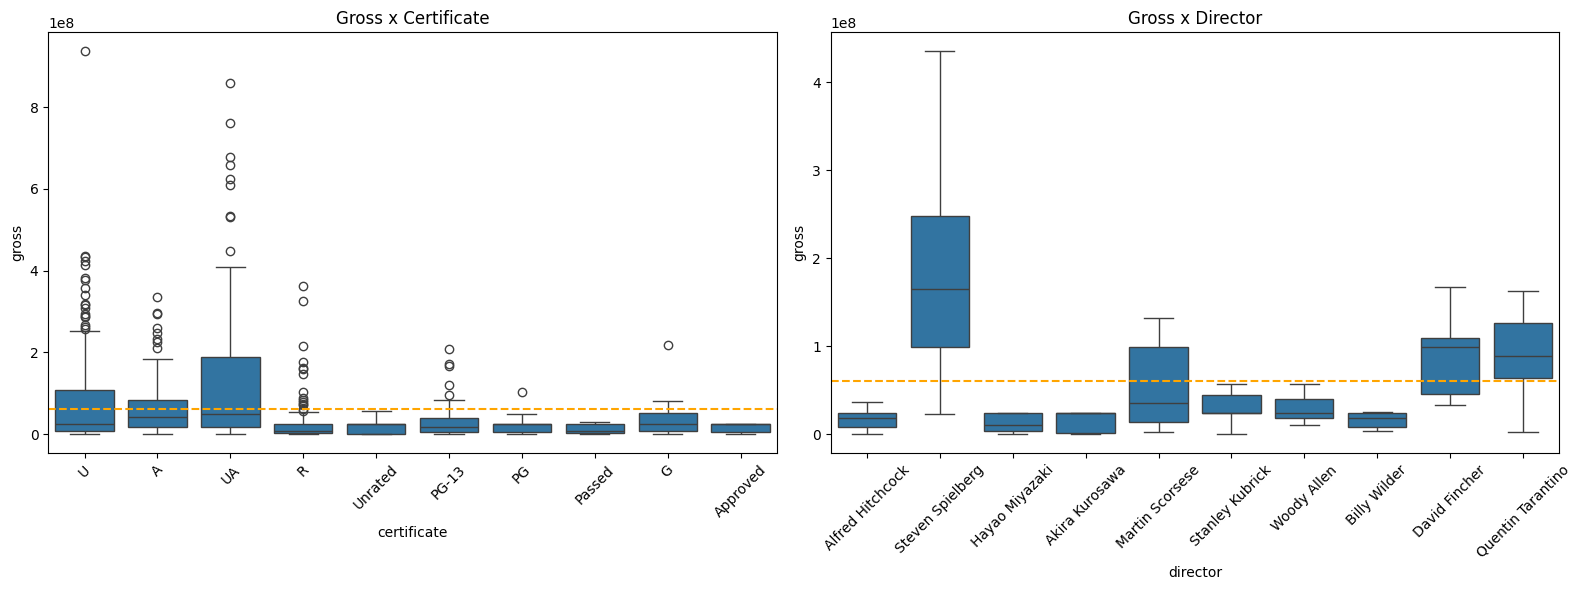

In [21]:
visualizer.cat_features_vs_target(1, 2, "gross", ["certificate", "director"], figsize=(16, 6))

In [22]:
columns = ["certificate", "director"]
top_grossing = {}
for col in columns:
    top_grossing[col] = df.groupby(col)["gross"].sum().sort_values(ascending=False).head(10).index

for col, values in top_grossing.items():
    print(f"Top 10 grossing {col}: {values}\n")

Top 10 grossing certificate: Index(['UA', 'U', 'A', 'R', 'PG-13', 'Unrated', 'PG', 'G', 'Passed',
       'Approved'],
      dtype='object', name='certificate')

Top 10 grossing director: Index(['Steven Spielberg', 'Anthony Russo', 'Christopher Nolan',
       'James Cameron', 'Peter Jackson', 'J.J. Abrams', 'Brad Bird',
       'Robert Zemeckis', 'David Yates', 'Pete Docter'],
      dtype='object', name='director')



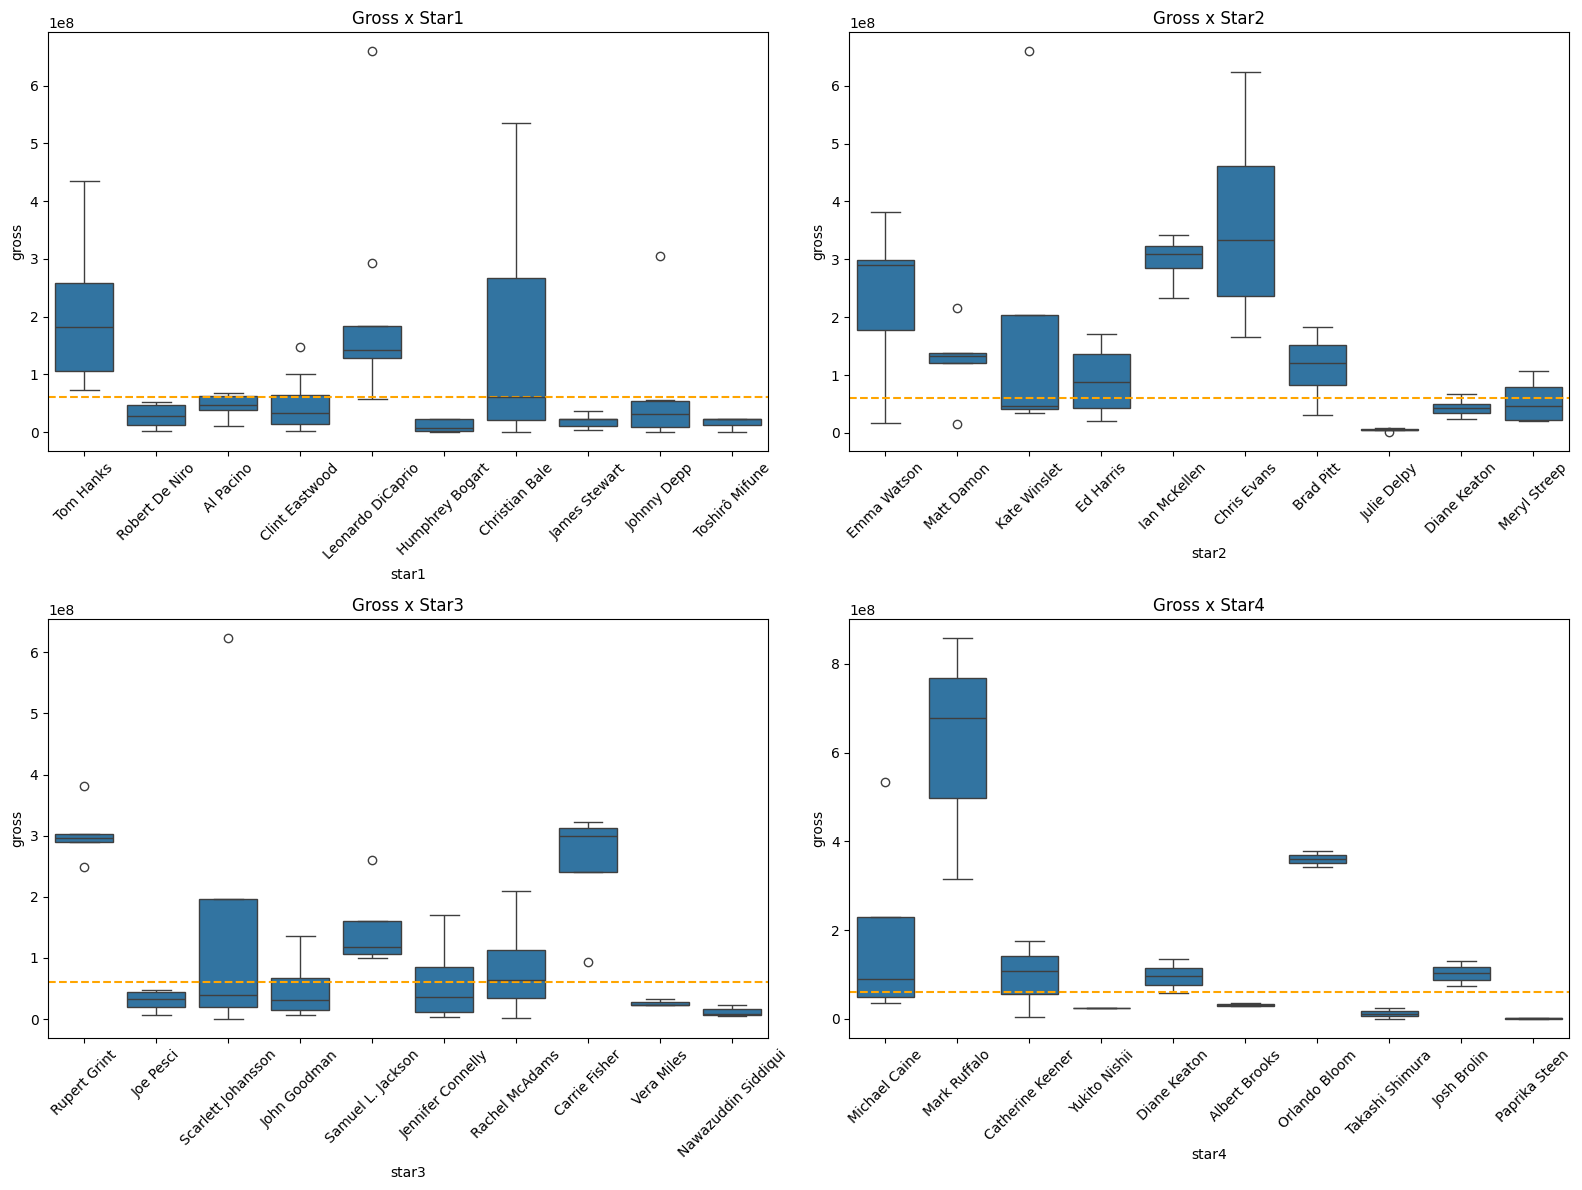

In [18]:
visualizer.cat_features_vs_target(2, 2, "gross", ["star1", "star2", "star3", "star4"], figsize=(16, 12))

In [34]:
columns = ["star1", "star2", "star3", "star4"]
top_grossing_stars = {}
for col in columns:
    top_grossing_stars[col] = df.groupby(col)["gross"].sum().sort_values(ascending=False).head(10).index

for col, stars in top_grossing_stars.items():
    print(f"Top 10 grossing {col}: {stars}\n")

Top 10 grossing star1: Index(['Tom Hanks', 'Joe Russo', 'Leonardo DiCaprio', 'Daniel Radcliffe',
       'Christian Bale', 'Robert Downey Jr.', 'Elijah Wood', 'Daisy Ridley',
       'Mark Hamill', 'Craig T. Nelson'],
      dtype='object', name='star1')

Top 10 grossing star2: Index(['Emma Watson', 'Robert Downey Jr.', 'Chris Evans', 'Ian McKellen',
       'Zoe Saldana', 'Tim Allen', 'John Boyega', 'Harrison Ford',
       'Kate Winslet', 'Tom Hardy'],
      dtype='object', name='star2')

Top 10 grossing star3: Index(['Rupert Grint', 'Carrie Fisher', 'Sigourney Weaver', 'Oscar Isaac',
       'Chris Evans', 'Scarlett Johansson', 'Chris Hemsworth', 'Billy Zane',
       'Orlando Bloom', 'Sarah Vowell'],
      dtype='object', name='star3')

Top 10 grossing star4: Index(['Mark Ruffalo', 'Domhnall Gleeson', 'Michelle Rodriguez',
       'Michael Caine', 'Orlando Bloom', 'Michael Gambon',
       'Scarlett Johansson', 'Kathy Bates', 'Jeremy Renner', 'Huck Milner'],
      dtype='object', name='star

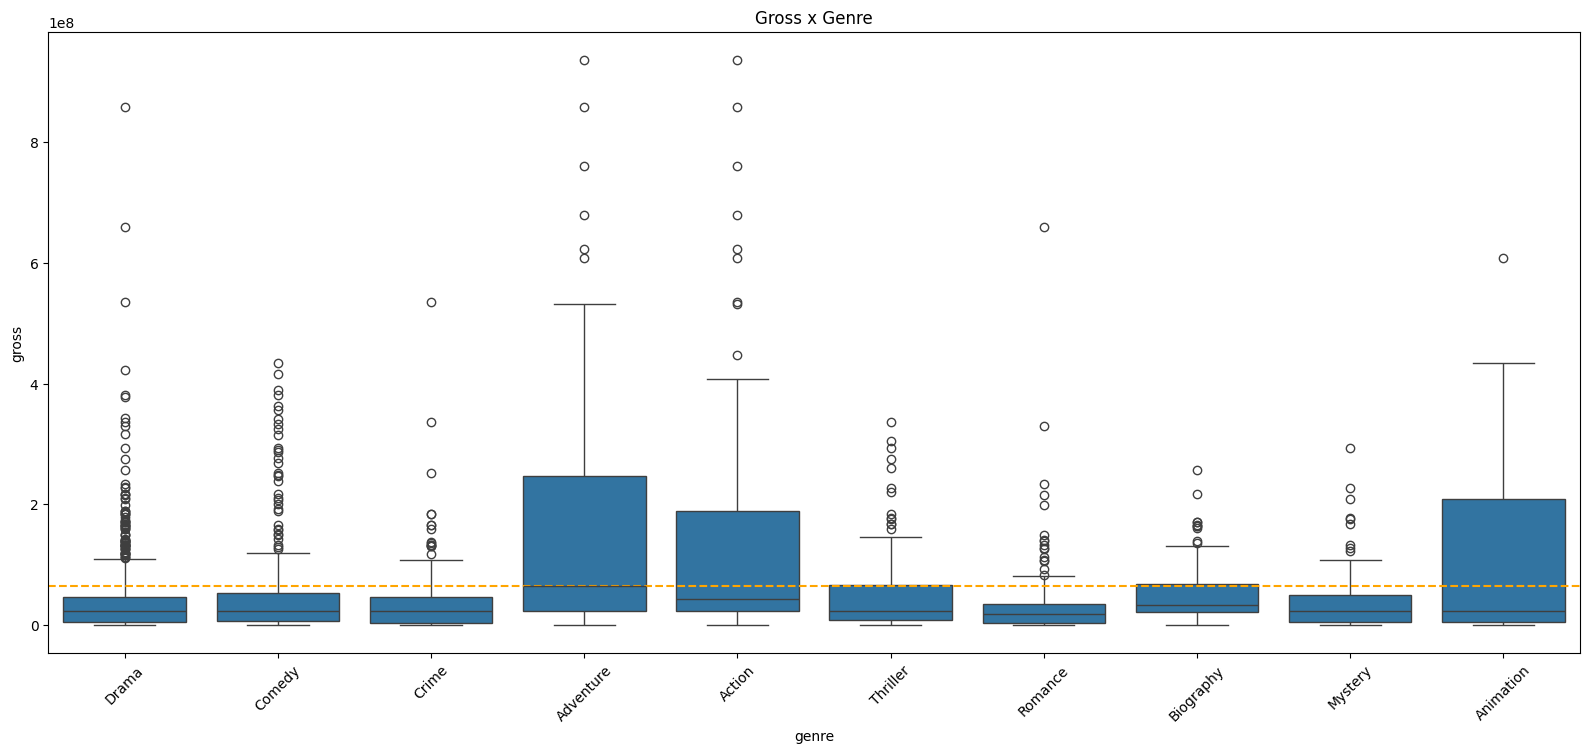

In [23]:
visualizer_genre.cat_features_vs_target(2, 1, "gross", ["genre"], figsize=(16, 14))

In [24]:
df_genre_exploded.groupby("genre")["gross"].sum().sort_values(ascending=False).head(10).index

Index(['Drama', 'Adventure', 'Action', 'Comedy', 'Sci-Fi', 'Animation',
       'Crime', 'Thriller', 'Fantasy', 'Biography'],
      dtype='object', name='genre')

 ### Based on this analysis and the others before, it's possible to conclude that to have a high grossing movie, you need:
- A big marketing campaign, to make people interested in watching the movie and generate more votes in reviews websites
- Strangely enough, you generally don't want a very high score on IMDB, but there are a few exceptions that caused the noise in the data, as mentioned in the analysis
- A "UA" or a "U" certificate, to make sure that you are giving the chance to the most amount of people possible to watch the movie, with every other certificate being way below the average gross
- Steven Spielberg, as the director, since he appears in the top 10 most famous ones with a median grossing higher than the average and is also in the top 10 grossing directors
- Tom Hanks, Leonardo DiCaprio or Christian Bale as the first star of the movie
- Emma Watson, Ian McKellen, Chris Evans or Kate Winslet as the second star of the movie
- Rupert Grint, Carrie Fisher or Scarlett Johansson as the third star of the movie
- Mark Ruffalo, Michael Caine or Orlando Bloom as the fourth star of the movie
- The genre appears to not be very relevant since all of them have a median below the gross average, but considering that "Drama" is so popular, is the top gross genre, and has the highest amount of outliers to the upside, this should be the genre of the movie
### In short, the IMDB rating and number of votes matter, and the categorical features matter if you use the correct people in your movie, pick the right genre or combination of genres, and get the right certificate to maximize the chances of a high grossing movie

# Can the movie genre be known by the `overview` column? Is there any insight that can be gained by this column?

In [4]:
genres = df_genre_exploded["genre"].str.lower().unique().tolist()

In [5]:
summaries = df["overview"].str.lower().to_list()
text_pattern = TextPattern(summaries)

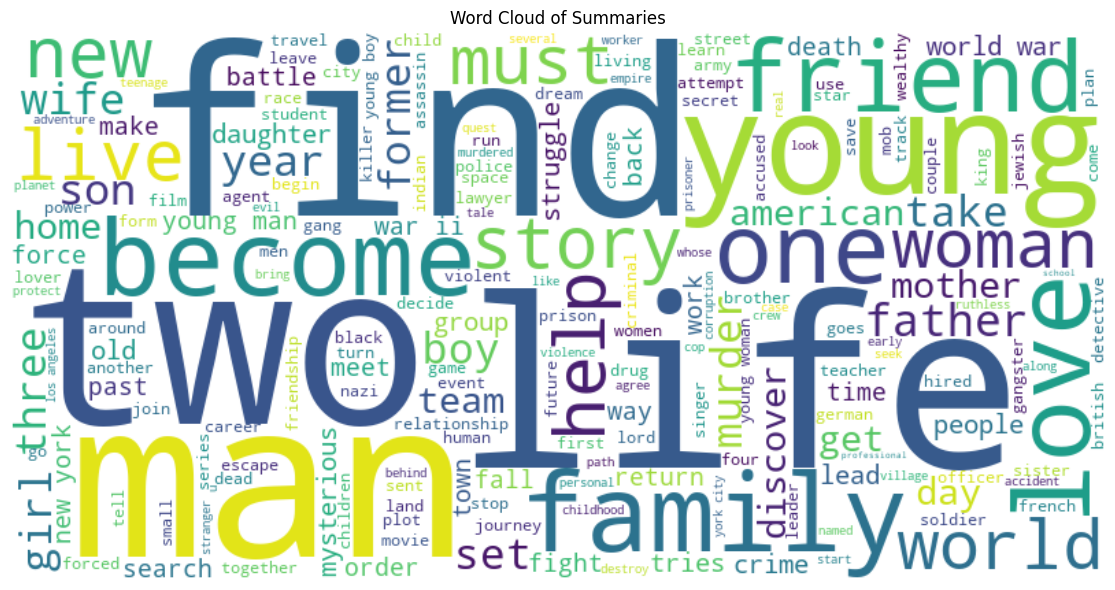

In [6]:
word_cloud_words = text_pattern.wordcloud()

In [7]:
genres_words = set(genres)
word_cloud_words = set(word_cloud_words)
print(f"Words that appear in the Word Cloud and are also genres: {genres_words.intersection(word_cloud_words)}")

Words that appear in the Word Cloud and are also genres: {'family', 'adventure', 'crime'}


### The Word Cloud shows that the summaries tend to use a lot of generic words to describe a movie, like **find**, **young**, **love**, but there's also words that appear that can relate to the genre, like **mysterious**, **detective**, **criminal**. The only genre words that are in this Word Cloud are **family**, **adventure** and **crime**, but they could be just words to describe the movie and not to explicitly say its genre

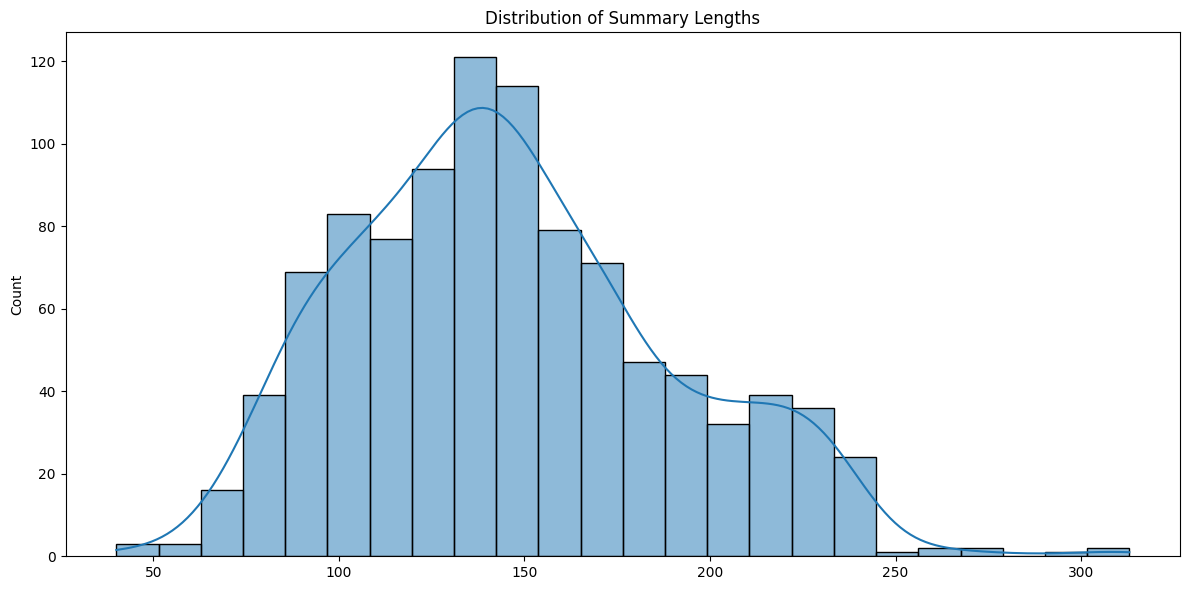

In [10]:
text_pattern.summary_lengths()

### From the distribution of lengths, we can conclude that these summaries tend to have around 100 to 170 characters, with other lengths being much less found. 140 to 150 words seems to be the sweet spot for a movie summary, having the most summaries written with these lengths

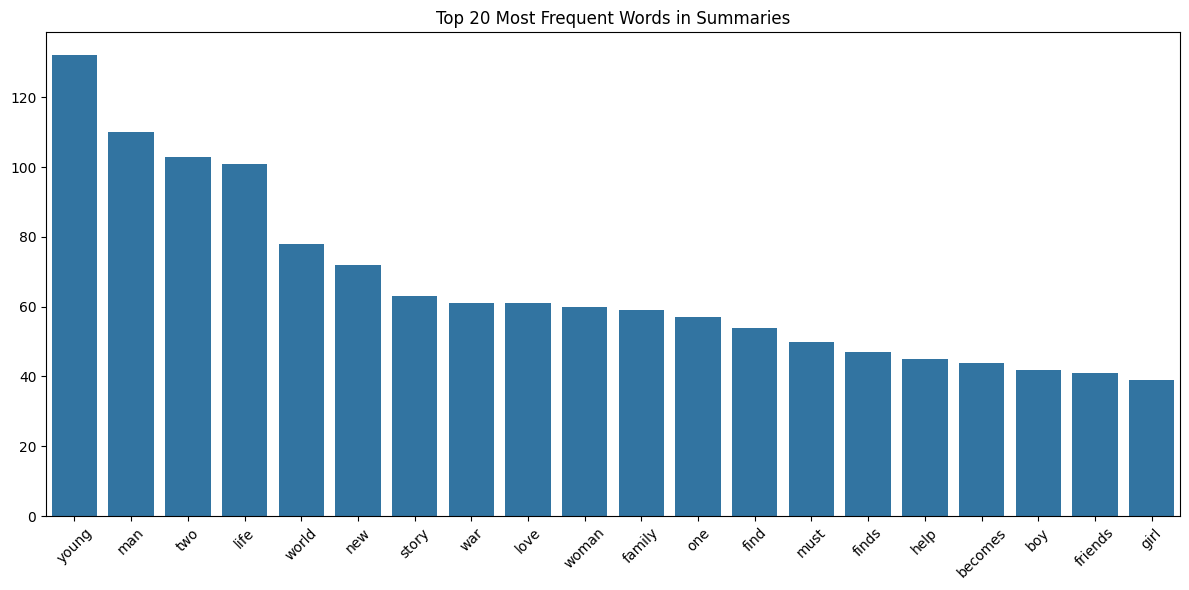

In [11]:
text_pattern.word_frequencies()

### From the barplot with the top 20 most frequent words, **young** is the most used, indicating the same thing as the Word Cloud, where generic words to describe what's in the movie tend to be the most used words in a summary. Out of these 20 most used words, only **family** and **war** are also genres, but like in the Word Cloud, the same thing applies here, where they could be just words to describe the movie and not to explicitly say its genre

### To actually see if the genre words are used in great quantities, we can plot how many times these words appear in general in every summary 

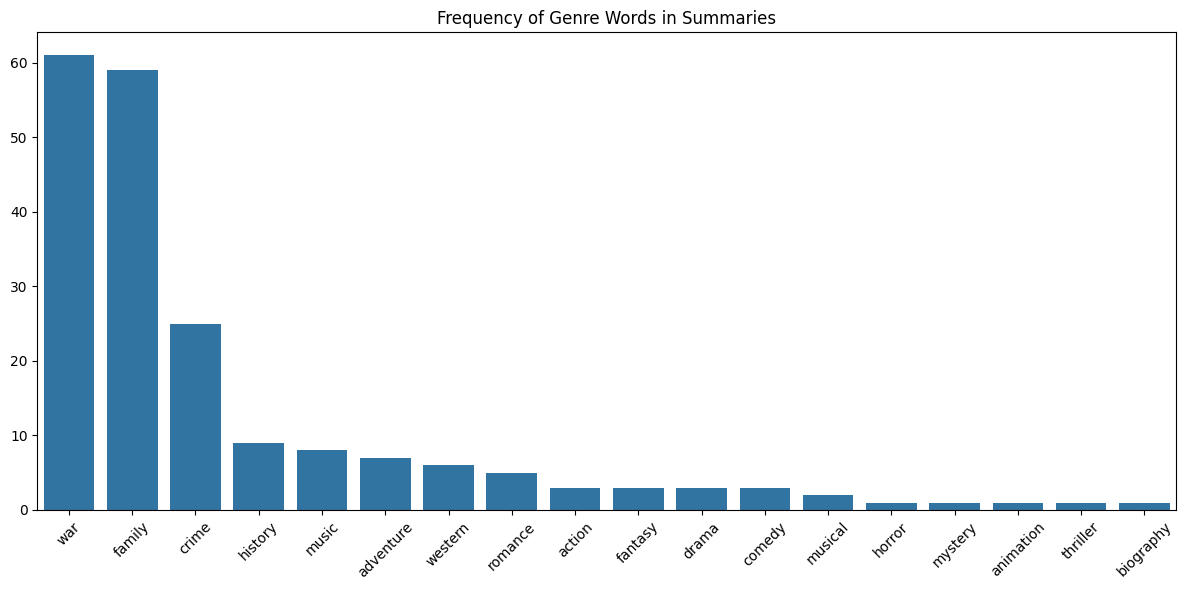

In [12]:
text_pattern.word_frequencies(words_list=genres)

### As we can see, only **war**, **family** are genre words that are actually highly used in summaries, with **crime** being in the middle and all the rest are used less than ten times 

### In conclusion, there are a few genre words that are used in a lot of summaries, but they can also be used to describe the movie. In addition, when looking at the Word Cloud and the barplot of the top 20 most used words, we can see that they are basically generic words used to describe a movie. To know the gender of the movie by just reading a summary that has no genre word in it, it would be very difficult. In addition, the summaries have a pattern of being 100 to 170 words long, showing that people who tend to write these descriptions actually try to make them long enough to keep the audience wanting more without getting the feeling that they were spoiled for reading them, and short enough so that the full information that they are trying to pass actually gets received, not just a 30 word description that the reader can't fully understand what it means

# Summary

### Main Insights:
- `No_of_votes` and `Gross` have a heavily positively skewed distribution, with mode < median < mean. The rest of the numerical columns have distributions close to a normal one
- `director` and all `star` columns have a lot of different people
- `meta_score`, `no_of_votes` and `gross` all show some correlation with `imdb_rating`, with the first one showing a positive non-linear relation, the second one a positive relation, and the last one a negative non-linear relation
- From the categorical features, `director` seems to have the biggest impact on the rating
- All genres have a median rating below the average, with outliers way above
- Some numerical features appear to have some correlation with the categorical ones, creating a pattern for the rating
- `released_year` showed that newer movies tend to get lower meta scores, but tend to have high gross and high number of votes
- Some numerical features appeared to have some correlation with one another, but in a non-linear way
- `series_title` and `overview` don't have an impact on the rating

### Implications for Feature Engineering and Modelling
- It would be interesting to test some methods to try to make the numerical columns distributions more closely resemble a Gaussian one
- `director`, all `star` columns and `certificate` can have their values grouped into categories, reducing the amount of values and making one-hot encoding viable
- The `genre` column can be one-hot encoded, but some manipulation of the data will need to happen since the values of the column are lists
- `series_title` and `overview` can be dropped
- Given the relation between `gross` and `no_of_votes`, a new column can be created to show the amount of gross of a movie per vote
- Another column that can be created is one to say the meta score of a movie per minute